In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from pylab import rcParams

Read the Datasets

In [2]:
df1=pd.read_csv('C:\\Users\\Arindam Adhikari\\Desktop\\PGP DSBA Great Lakes\\Excel & CSV Files\\Sparkling.csv')

In [3]:
df2=pd.read_csv('C:\\Users\\Arindam Adhikari\\Desktop\\PGP DSBA Great Lakes\\Excel & CSV Files\\Rose.csv')

In [4]:
df1.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [5]:
df1.isnull().sum()

YearMonth    0
Sparkling    0
dtype: int64

In [6]:
df1.shape

(187, 2)

In [7]:
df2.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [8]:
df2.isnull().sum()

YearMonth    0
Rose         2
dtype: int64

In [9]:
df2['Rose'].fillna(0,inplace=True)

In [10]:
df2.shape

(187, 2)

Join the two data sets

In [11]:
df3=pd.concat([df1,df2],axis=1)

In [12]:
df3.tail()

YearMonth  Sparkling YearMonth  Rose
182   1995-03       1897   1995-03  45.0
183   1995-04       1862   1995-04  52.0
184   1995-05       1670   1995-05  28.0
185   1995-06       1688   1995-06  40.0
186   1995-07       2031   1995-07  62.0

In [13]:
df3['Date']=pd.date_range(start='01-01-1980',periods=len(df3),freq='M')

In [14]:
df3=df3.drop('YearMonth',axis=1)

In [15]:
df3.set_index('Date',inplace=True)

In [16]:
df3['TotalSales']=df3['Sparkling']+df3['Rose']

In [17]:
df3.head()

Sparkling   Rose  TotalSales
Date                                    
1980-01-31       1686  112.0      1798.0
1980-02-29       1591  118.0      1709.0
1980-03-31       2304  129.0      2433.0
1980-04-30       1712   99.0      1811.0
1980-05-31       1471  116.0      1587.0

In [18]:
df3['Sparkling'].isnull().sum()

0

In [19]:
df3['Rose'].isnull().sum()

0

In [20]:
df3['Rose'].fillna(0,inplace=True)

Plot The Data

In [21]:
rcParams['figure.figsize']=20,8

<Axes: xlabel='Date'>

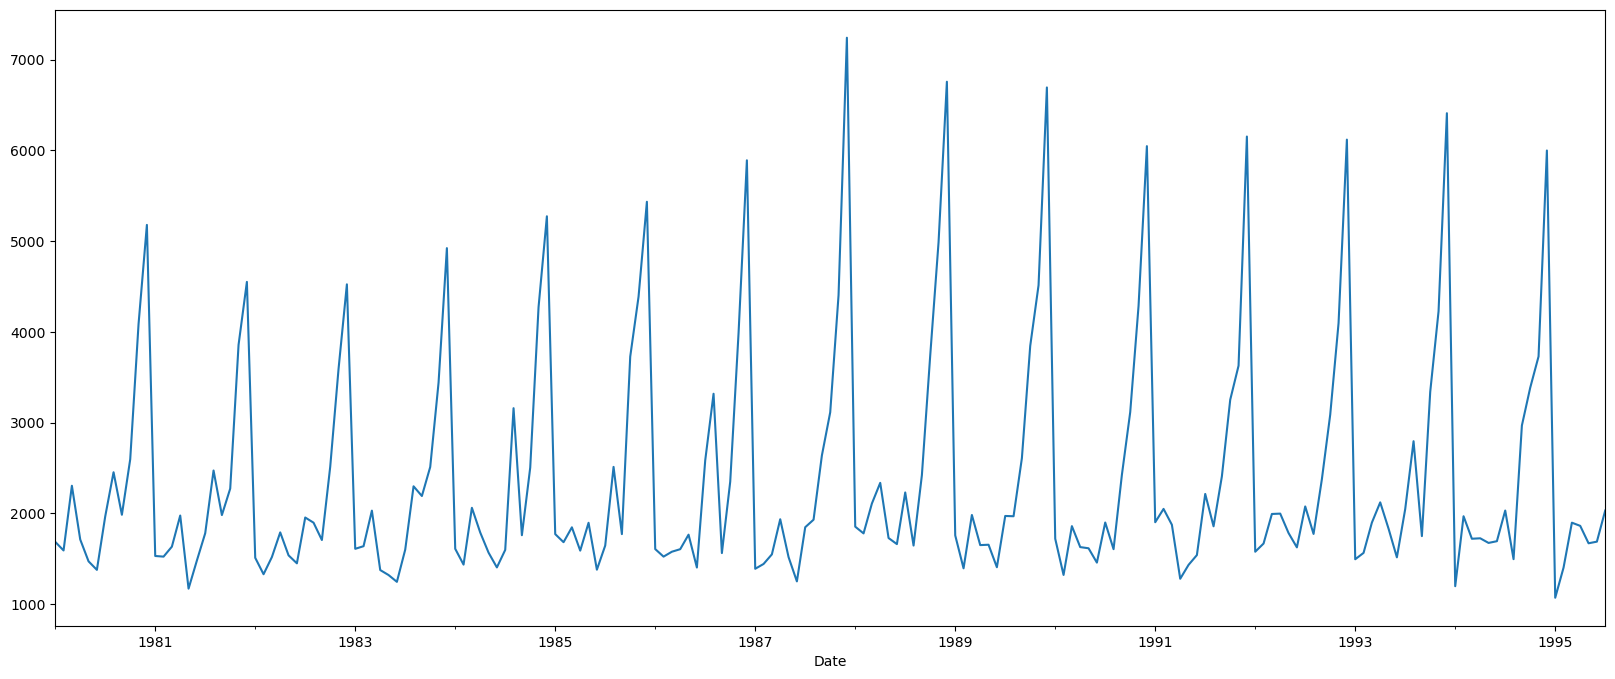

In [22]:
df3['Sparkling'].plot()

<Axes: xlabel='Date'>

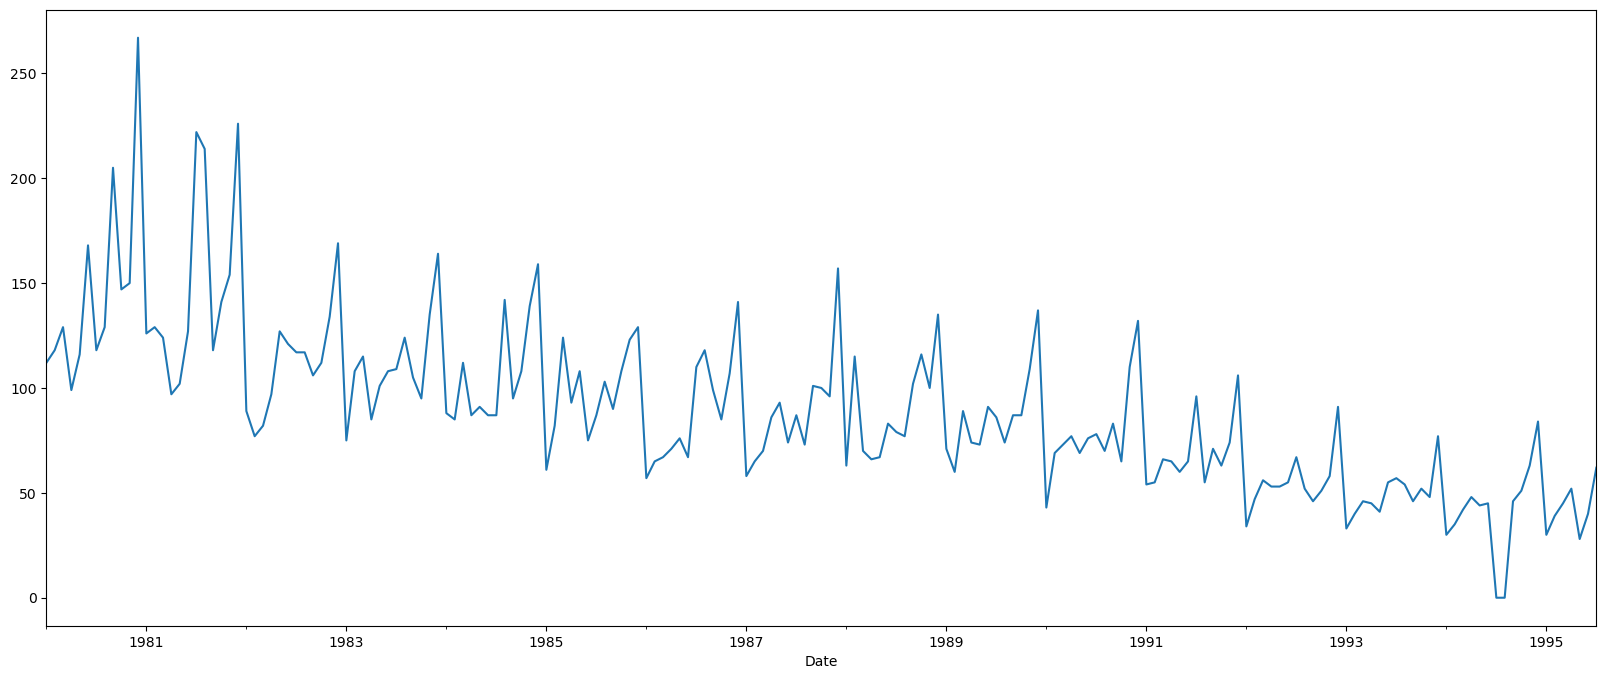

In [23]:
df3['Rose'].plot()

<Axes: xlabel='Date'>

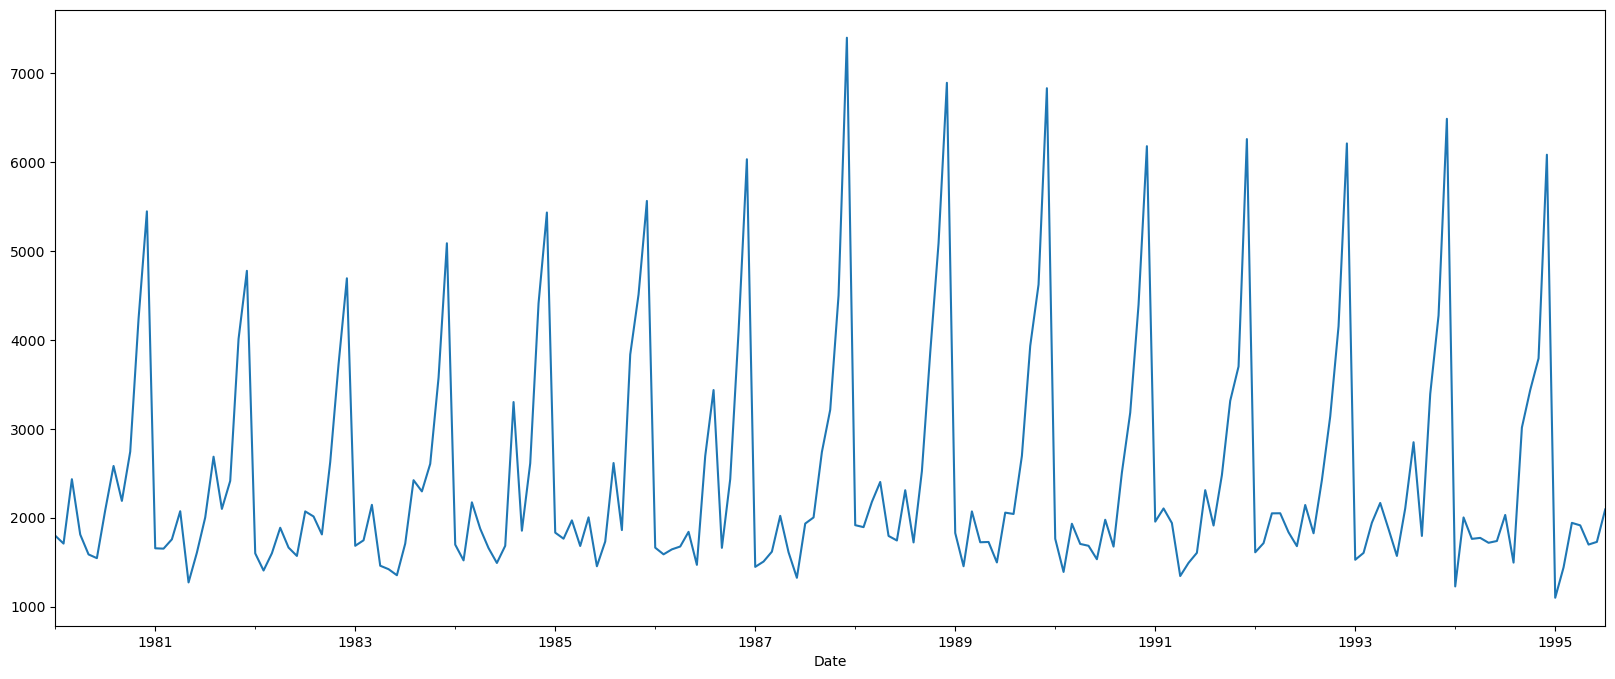

In [24]:
df3['TotalSales'].plot()

Perform EDA

<Axes: xlabel='Date', ylabel='Sparkling'>

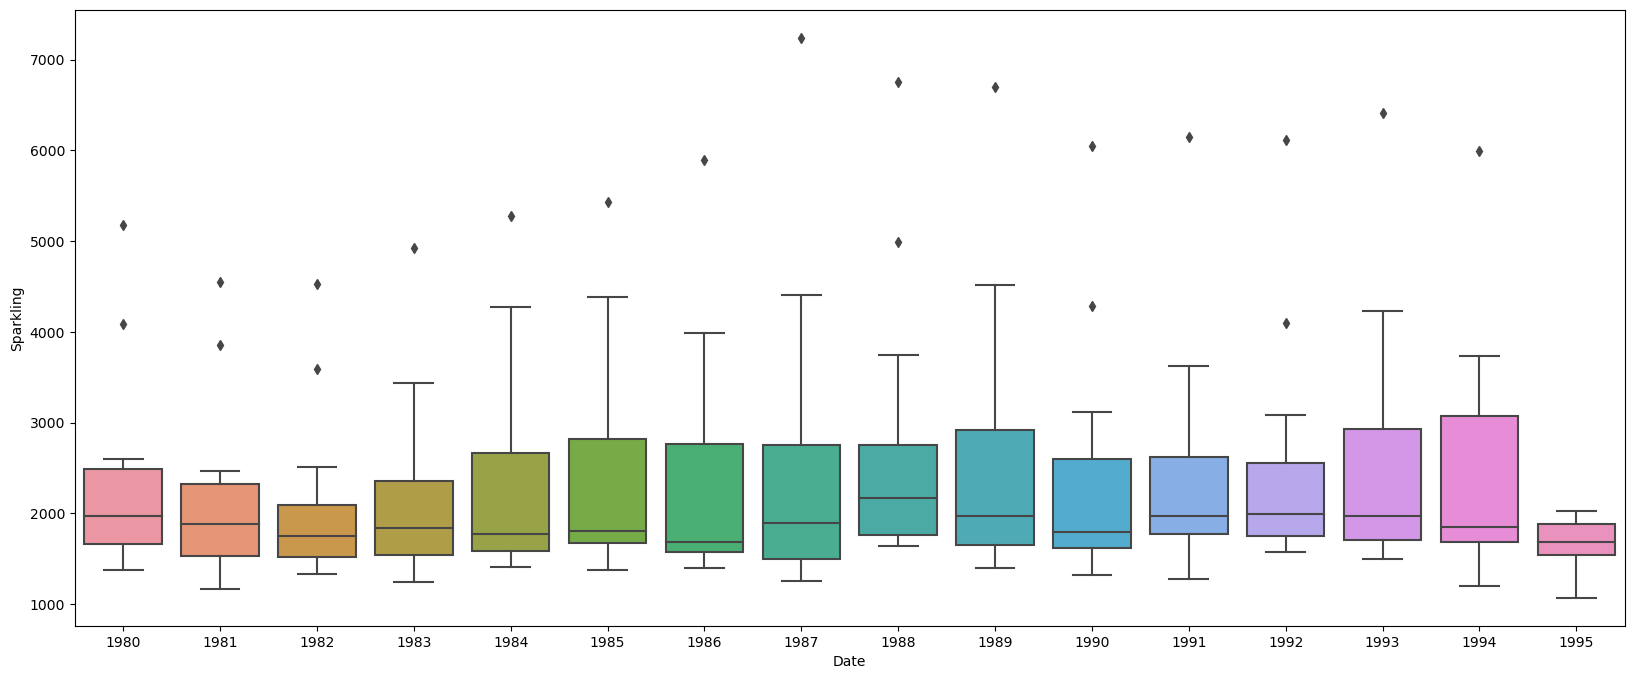

In [25]:
sns.boxplot(x=df3.index.year,y=df3.Sparkling)

<Axes: xlabel='Date', ylabel='Rose'>

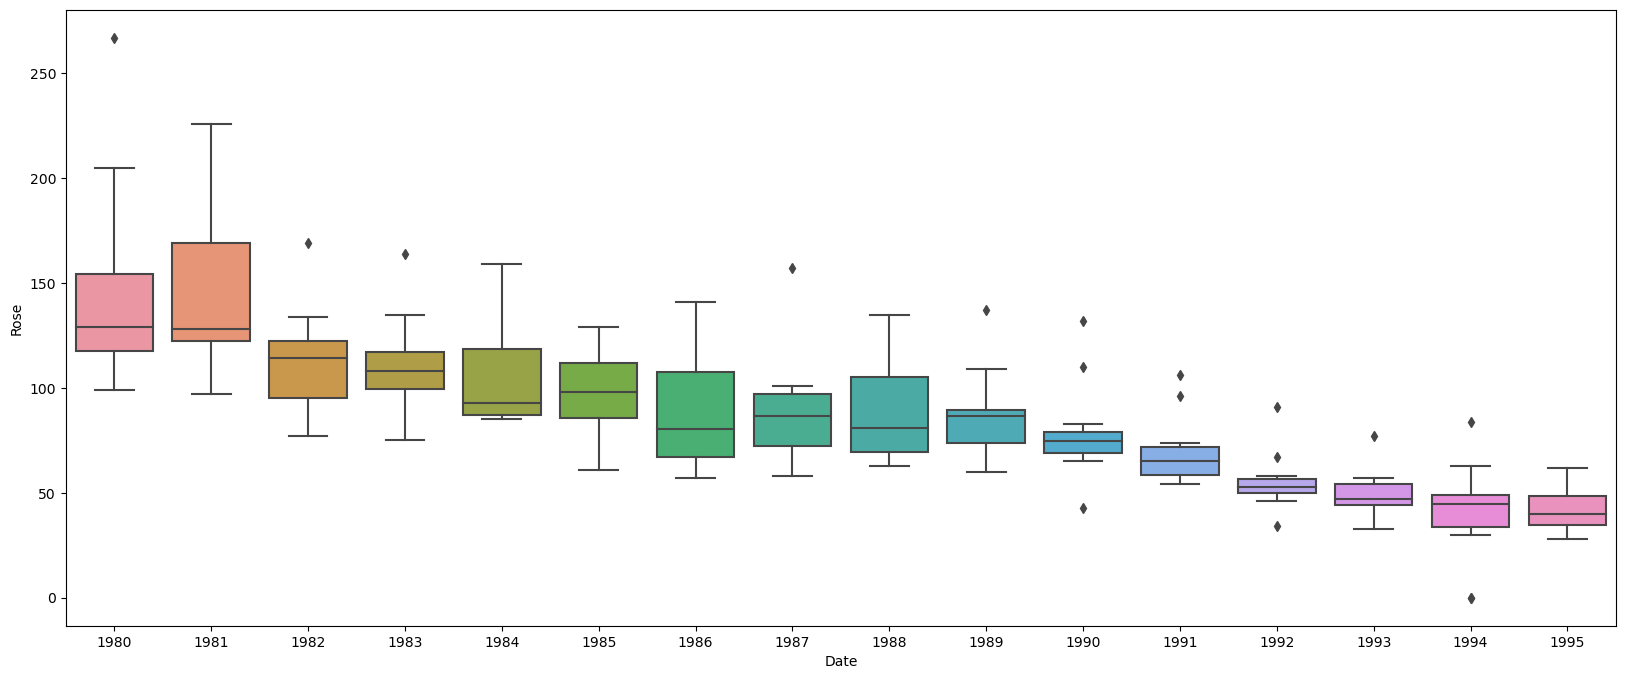

In [26]:
sns.boxplot(x=df3.index.year,y=df3.Rose)

<Axes: xlabel='Date', ylabel='TotalSales'>

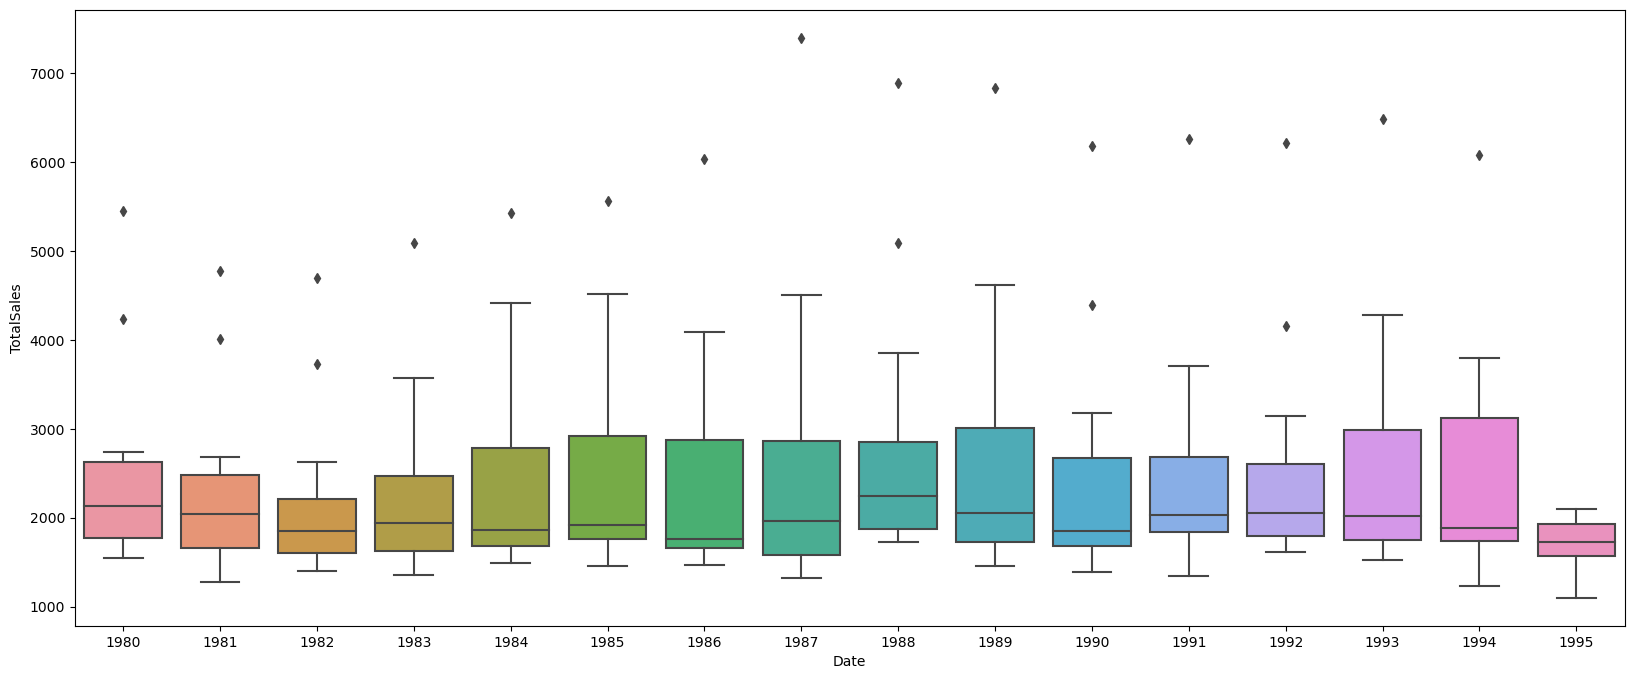

In [27]:
sns.boxplot(x=df3.index.year,y=df3.TotalSales)

In [28]:
pivot1=pd.pivot_table(df3,columns=df3.index.year,index=df3.index.month,values='Sparkling')
pivot1

Date    1980    1981    1982    1983    1984    1985    1986    1987    1988  \
Date                                                                           
1     1686.0  1530.0  1510.0  1609.0  1609.0  1771.0  1606.0  1389.0  1853.0   
2     1591.0  1523.0  1329.0  1638.0  1435.0  1682.0  1523.0  1442.0  1779.0   
3     2304.0  1633.0  1518.0  2030.0  2061.0  1846.0  1577.0  1548.0  2108.0   
4     1712.0  1976.0  1790.0  1375.0  1789.0  1589.0  1605.0  1935.0  2336.0   
5     1471.0  1170.0  1537.0  1320.0  1567.0  1896.0  1765.0  1518.0  1728.0   
6     1377.0  1480.0  1449.0  1245.0  1404.0  1379.0  1403.0  1250.0  1661.0   
7     1966.0  1781.0  1954.0  1600.0  1597.0  1645.0  2584.0  1847.0  2230.0   
8     2453.0  2472.0  1897.0  2298.0  3159.0  2512.0  3318.0  1930.0  1645.0   
9     1984.0  1981.0  1706.0  2191.0  1759.0  1771.0  1562.0  2638.0  2421.0   
10    2596.0  2273.0  2514.0  2511.0  2504.0  3727.0  2349.0  3114.0  3740.0   
11    4087.0  3857.0  3593.0  3440.0  4273.0  4388.0  3987.0  4405.0  4988.0   
12    5179.0  4551.0  4524.0  4923.0  5274.0  5434.0  5891.0  7242.0  6757.0   

Date    1989    1990    1991    1992    1993    1994    1995  
Date                                                          
1     1757.0  1720.0  1902.0  1577.0  1494.0  1197.0  1070.0  
2     1394.0  1321.0  2049.0  1667.0  1564.0  1968.0  1402.0  
3     1982.0  1859.0  1874.0  1993.0  1898.0  1720.0  1897.0  
4     1650.0  1628.0  1279.0  1997.0  2121.0  1725.0  1862.0  
5     1654.0  1615.0  1432.0  1783.0  1831.0  1674.0  1670.0  
6     1406.0  1457.0  1540.0  1625.0  1515.0  1693.0  1688.0  
7     1971.0  1899.0  2214.0  2076.0  2048.0  2031.0  2031.0  
8     1968.0  1605.0  1857.0  1773.0  2795.0  1495.0     NaN  
9     2608.0  2424.0  2408.0  2377.0  1749.0  2968.0     NaN  
10    3845.0  3116.0  3252.0  3088.0  3339.0  3385.0     NaN  
11    4514.0  4286.0  3627.0  4096.0  4227.0  3729.0     NaN  
12    6694.0  6047.0  6153.0  6119.0  6410.0  5999.0     NaN

<Axes: xlabel='Date'>

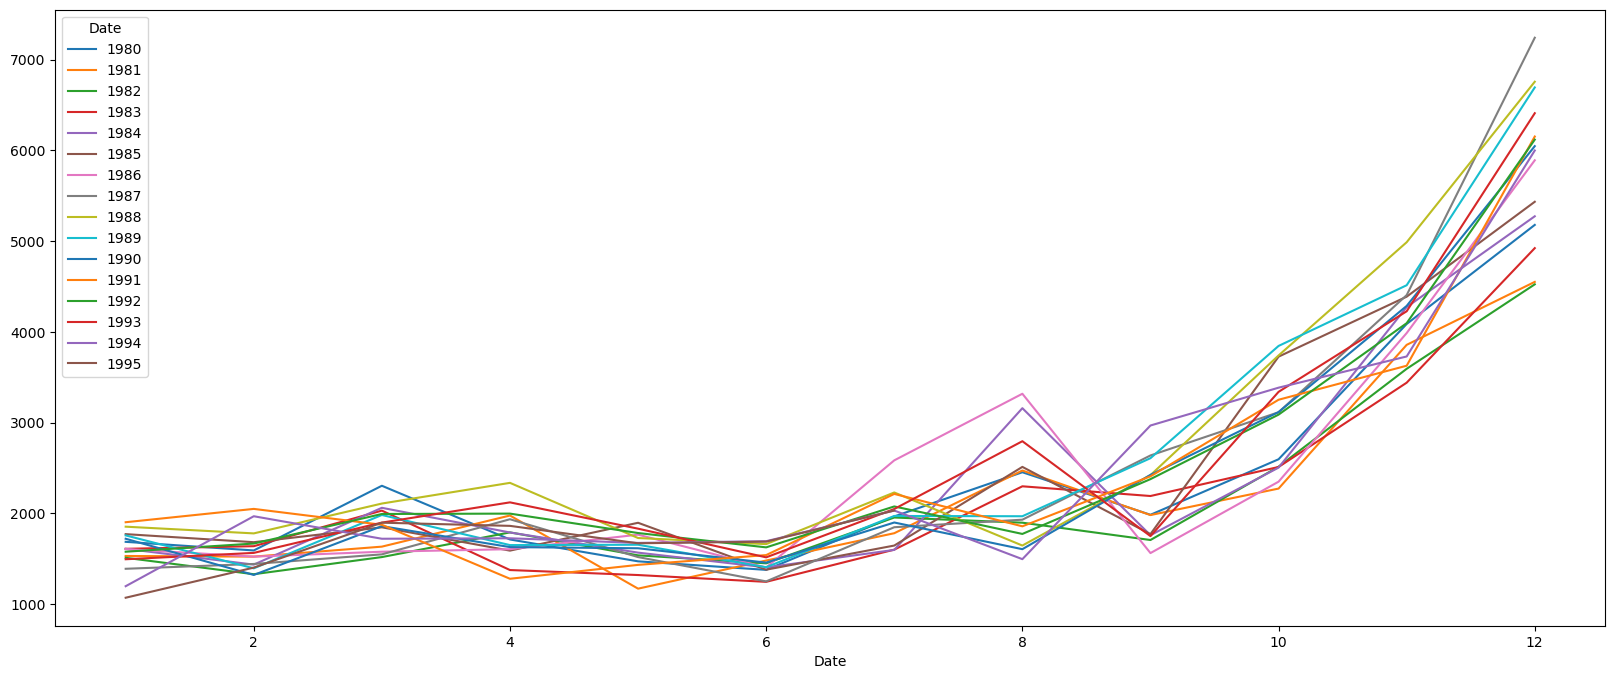

In [29]:
pivot1.plot()

In [30]:
pivot2=pd.pivot_table(df3,columns=df3.index.year,index=df3.index.month,values='Rose')
pivot2

Date   1980   1981   1982   1983   1984   1985   1986   1987   1988   1989  \
Date                                                                         
1     112.0  126.0   89.0   75.0   88.0   61.0   57.0   58.0   63.0   71.0   
2     118.0  129.0   77.0  108.0   85.0   82.0   65.0   65.0  115.0   60.0   
3     129.0  124.0   82.0  115.0  112.0  124.0   67.0   70.0   70.0   89.0   
4      99.0   97.0   97.0   85.0   87.0   93.0   71.0   86.0   66.0   74.0   
5     116.0  102.0  127.0  101.0   91.0  108.0   76.0   93.0   67.0   73.0   
6     168.0  127.0  121.0  108.0   87.0   75.0   67.0   74.0   83.0   91.0   
7     118.0  222.0  117.0  109.0   87.0   87.0  110.0   87.0   79.0   86.0   
8     129.0  214.0  117.0  124.0  142.0  103.0  118.0   73.0   77.0   74.0   
9     205.0  118.0  106.0  105.0   95.0   90.0   99.0  101.0  102.0   87.0   
10    147.0  141.0  112.0   95.0  108.0  108.0   85.0  100.0  116.0   87.0   
11    150.0  154.0  134.0  135.0  139.0  123.0  107.0   96.0  100.0  109.0   
12    267.0  226.0  169.0  164.0  159.0  129.0  141.0  157.0  135.0  137.0   

Date   1990   1991  1992  1993  1994  1995  
Date                                        
1      43.0   54.0  34.0  33.0  30.0  30.0  
2      69.0   55.0  47.0  40.0  35.0  39.0  
3      73.0   66.0  56.0  46.0  42.0  45.0  
4      77.0   65.0  53.0  45.0  48.0  52.0  
5      69.0   60.0  53.0  41.0  44.0  28.0  
6      76.0   65.0  55.0  55.0  45.0  40.0  
7      78.0   96.0  67.0  57.0   0.0  62.0  
8      70.0   55.0  52.0  54.0   0.0   NaN  
9      83.0   71.0  46.0  46.0  46.0   NaN  
10     65.0   63.0  51.0  52.0  51.0   NaN  
11    110.0   74.0  58.0  48.0  63.0   NaN  
12    132.0  106.0  91.0  77.0  84.0   NaN

<Axes: xlabel='Date'>

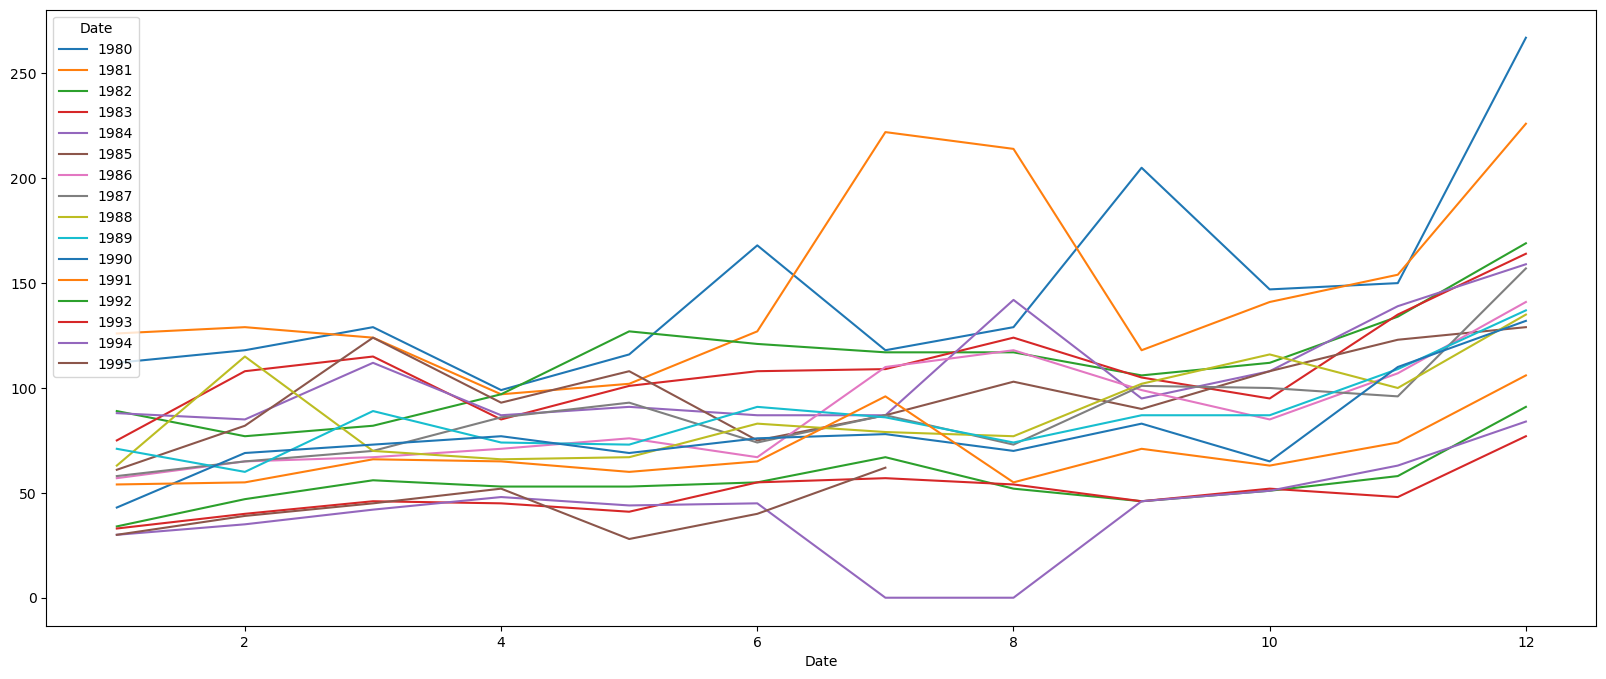

In [31]:
pivot2.plot()

In [32]:
pivot3=pd.pivot_table(df3,columns=df3.index.year,index=df3.index.month,values='TotalSales')
pivot3

Date    1980    1981    1982    1983    1984    1985    1986    1987    1988  \
Date                                                                           
1     1798.0  1656.0  1599.0  1684.0  1697.0  1832.0  1663.0  1447.0  1916.0   
2     1709.0  1652.0  1406.0  1746.0  1520.0  1764.0  1588.0  1507.0  1894.0   
3     2433.0  1757.0  1600.0  2145.0  2173.0  1970.0  1644.0  1618.0  2178.0   
4     1811.0  2073.0  1887.0  1460.0  1876.0  1682.0  1676.0  2021.0  2402.0   
5     1587.0  1272.0  1664.0  1421.0  1658.0  2004.0  1841.0  1611.0  1795.0   
6     1545.0  1607.0  1570.0  1353.0  1491.0  1454.0  1470.0  1324.0  1744.0   
7     2084.0  2003.0  2071.0  1709.0  1684.0  1732.0  2694.0  1934.0  2309.0   
8     2582.0  2686.0  2014.0  2422.0  3301.0  2615.0  3436.0  2003.0  1722.0   
9     2189.0  2099.0  1812.0  2296.0  1854.0  1861.0  1661.0  2739.0  2523.0   
10    2743.0  2414.0  2626.0  2606.0  2612.0  3835.0  2434.0  3214.0  3856.0   
11    4237.0  4011.0  3727.0  3575.0  4412.0  4511.0  4094.0  4501.0  5088.0   
12    5446.0  4777.0  4693.0  5087.0  5433.0  5563.0  6032.0  7399.0  6892.0   

Date    1989    1990    1991    1992    1993    1994    1995  
Date                                                          
1     1828.0  1763.0  1956.0  1611.0  1527.0  1227.0  1100.0  
2     1454.0  1390.0  2104.0  1714.0  1604.0  2003.0  1441.0  
3     2071.0  1932.0  1940.0  2049.0  1944.0  1762.0  1942.0  
4     1724.0  1705.0  1344.0  2050.0  2166.0  1773.0  1914.0  
5     1727.0  1684.0  1492.0  1836.0  1872.0  1718.0  1698.0  
6     1497.0  1533.0  1605.0  1680.0  1570.0  1738.0  1728.0  
7     2057.0  1977.0  2310.0  2143.0  2105.0  2031.0  2093.0  
8     2042.0  1675.0  1912.0  1825.0  2849.0  1495.0     NaN  
9     2695.0  2507.0  2479.0  2423.0  1795.0  3014.0     NaN  
10    3932.0  3181.0  3315.0  3139.0  3391.0  3436.0     NaN  
11    4623.0  4396.0  3701.0  4154.0  4275.0  3792.0     NaN  
12    6831.0  6179.0  6259.0  6210.0  6487.0  6083.0     NaN

<Axes: xlabel='Date'>

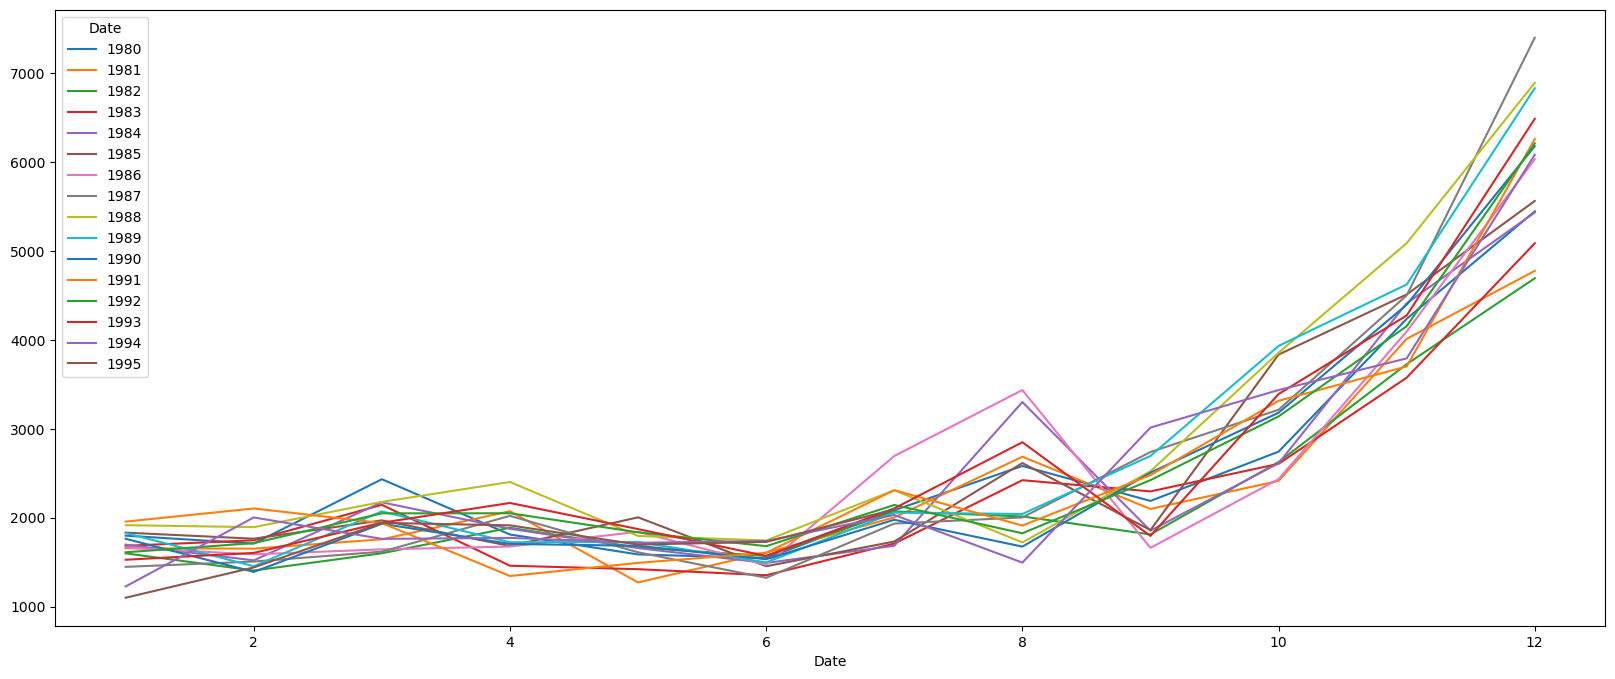

In [33]:
pivot3.plot()

<Axes: xlabel='Date'>

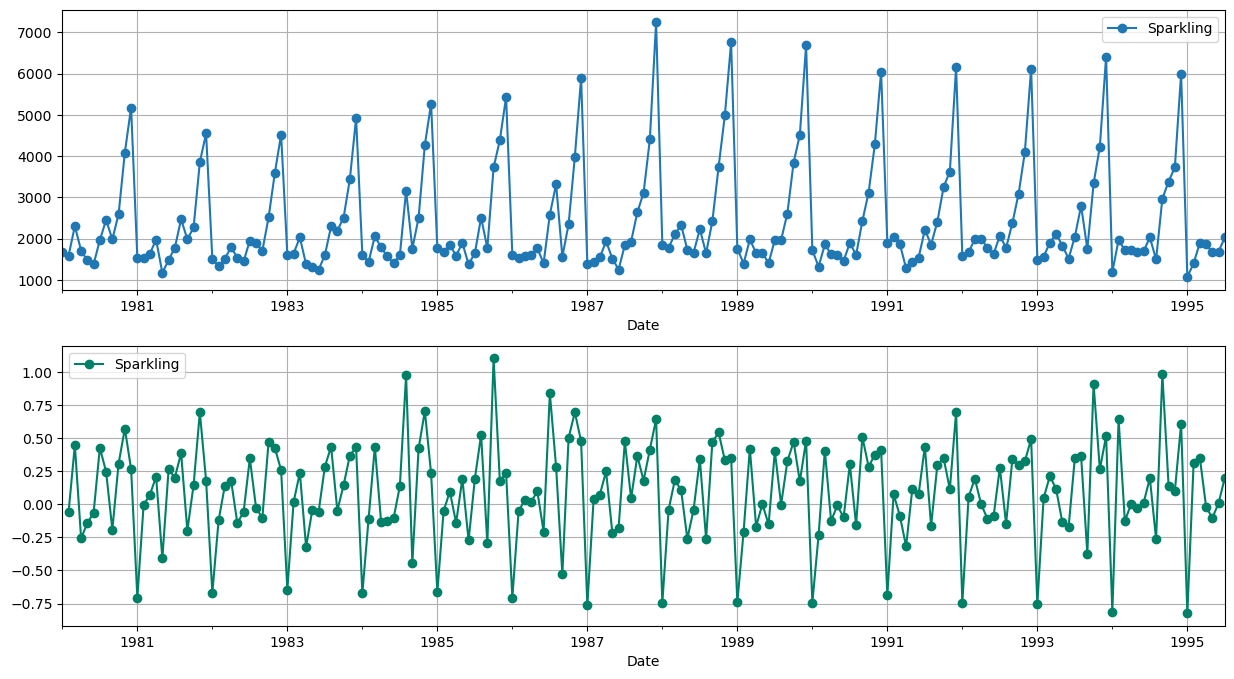

In [34]:
avg1=df3.groupby('Date')['Sparkling'].mean()
pct_chg1=df3.groupby('Date')['Sparkling'].sum().pct_change()
fig,axs=plt.subplots(nrows=2,ncols=1,figsize=(15,8))
avg1.plot(legend=True,marker='o',grid=True,ax=axs[0])
pct_chg1.plot(legend=True,marker='o',grid=True,ax=axs[1],colormap='summer')

<Axes: xlabel='Date'>

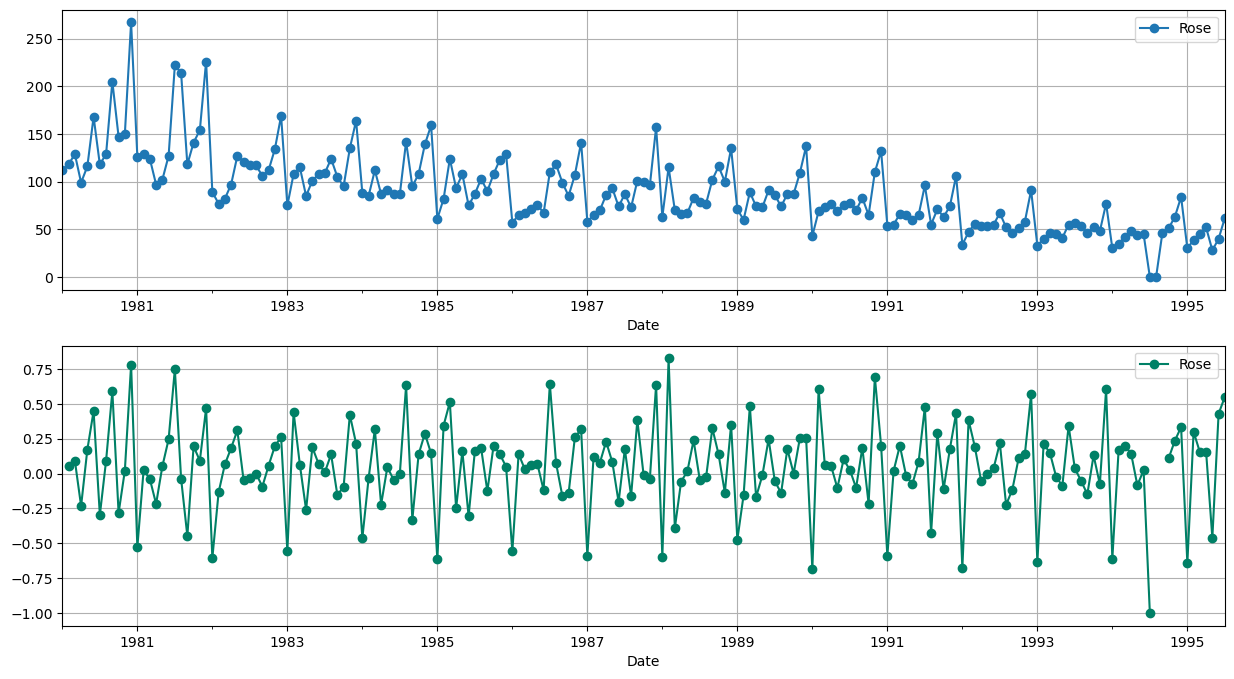

In [35]:
avg2=df3.groupby('Date')['Rose'].mean()
pct_chg2=df3.groupby('Date')['Rose'].sum().pct_change()
fig,axs=plt.subplots(nrows=2,ncols=1,figsize=(15,8))
avg2.plot(legend=True,grid=True,marker='o',ax=axs[0])
pct_chg2.plot(legend=True,grid=True,marker='o',ax=axs[1],colormap='summer')

<Axes: xlabel='Date'>

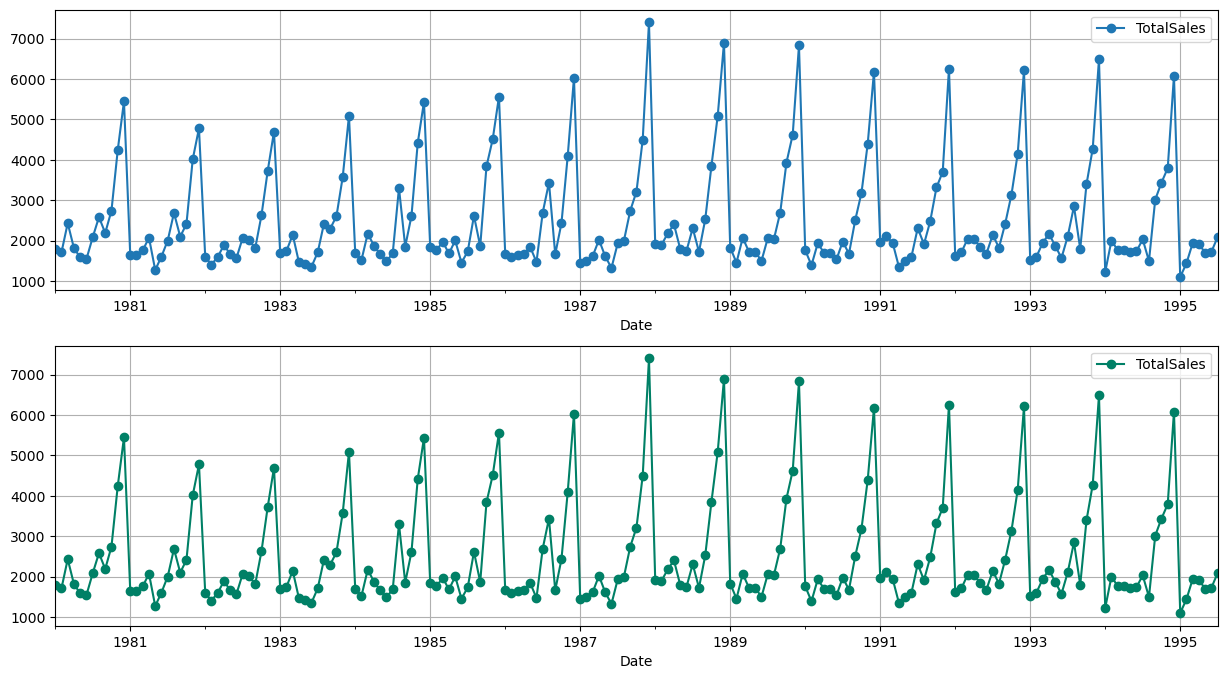

In [36]:
avg3=df3.groupby('Date')['TotalSales'].mean()
pct_chg3=df3.groupby('Date')['TotalSales'].sum().pct_change()
fig,axs=plt.subplots(nrows=2,ncols=1,figsize=(15,8))
avg3.plot(legend=True,grid=True,marker='o',ax=axs[0])
avg3.plot(legend=True,grid=True,marker='o',ax=axs[1],colormap='summer')

Perform Decomposition

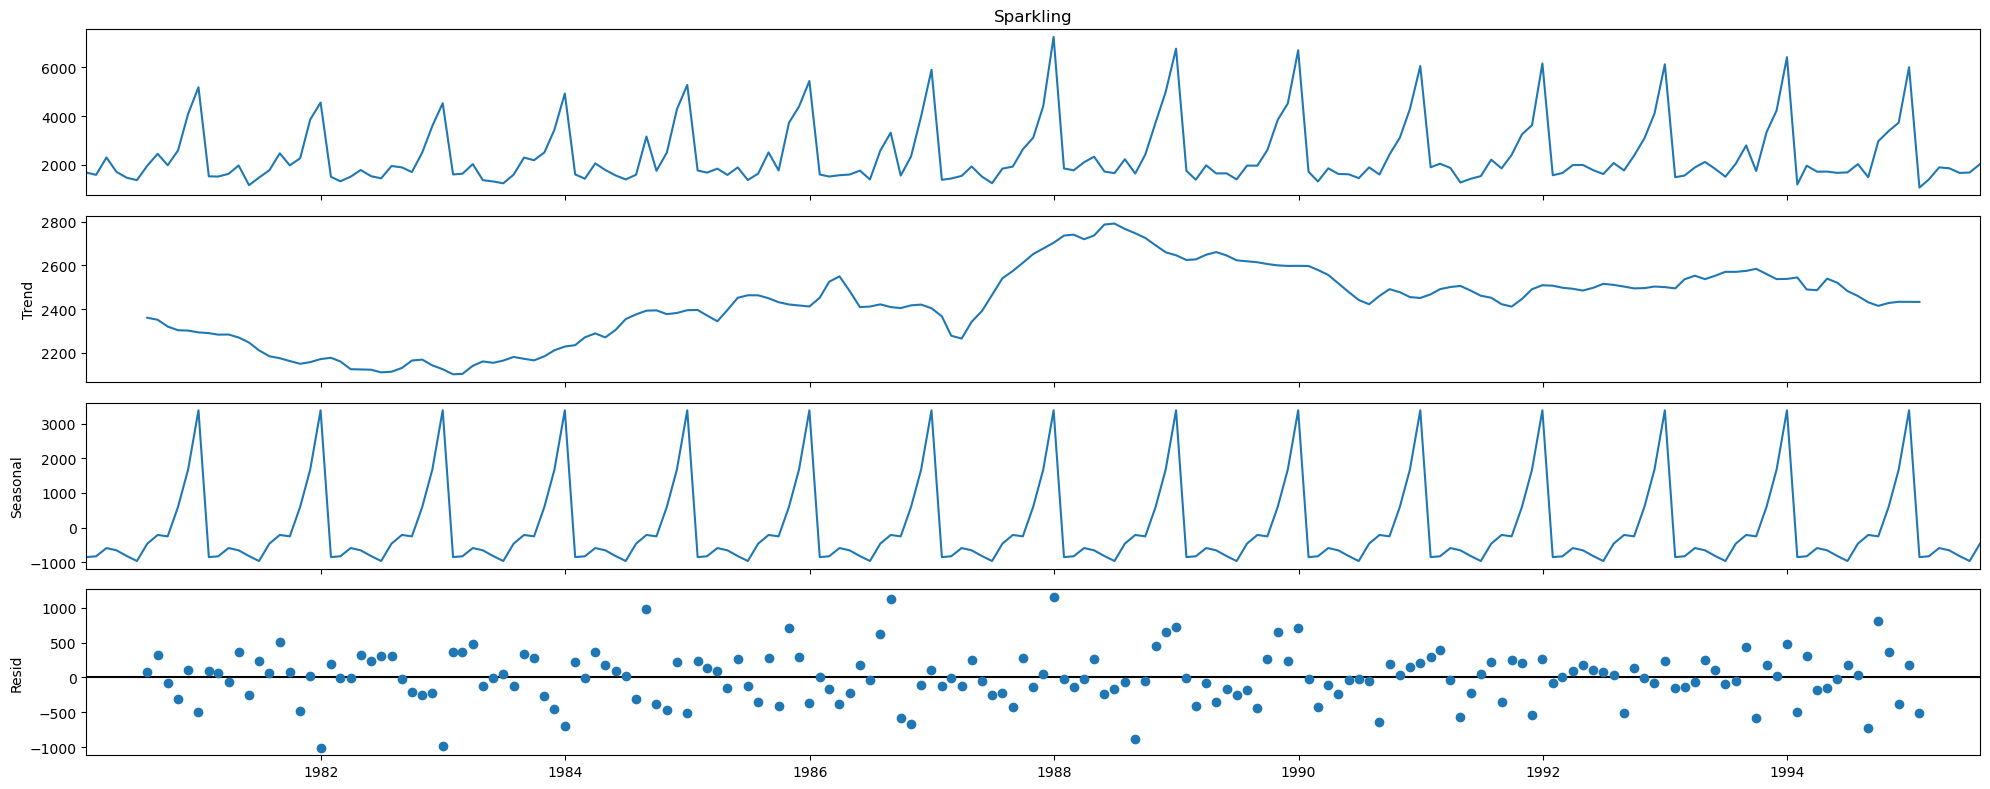

In [37]:
sd1=seasonal_decompose(df3['Sparkling'],model='additive')
sd1.plot();

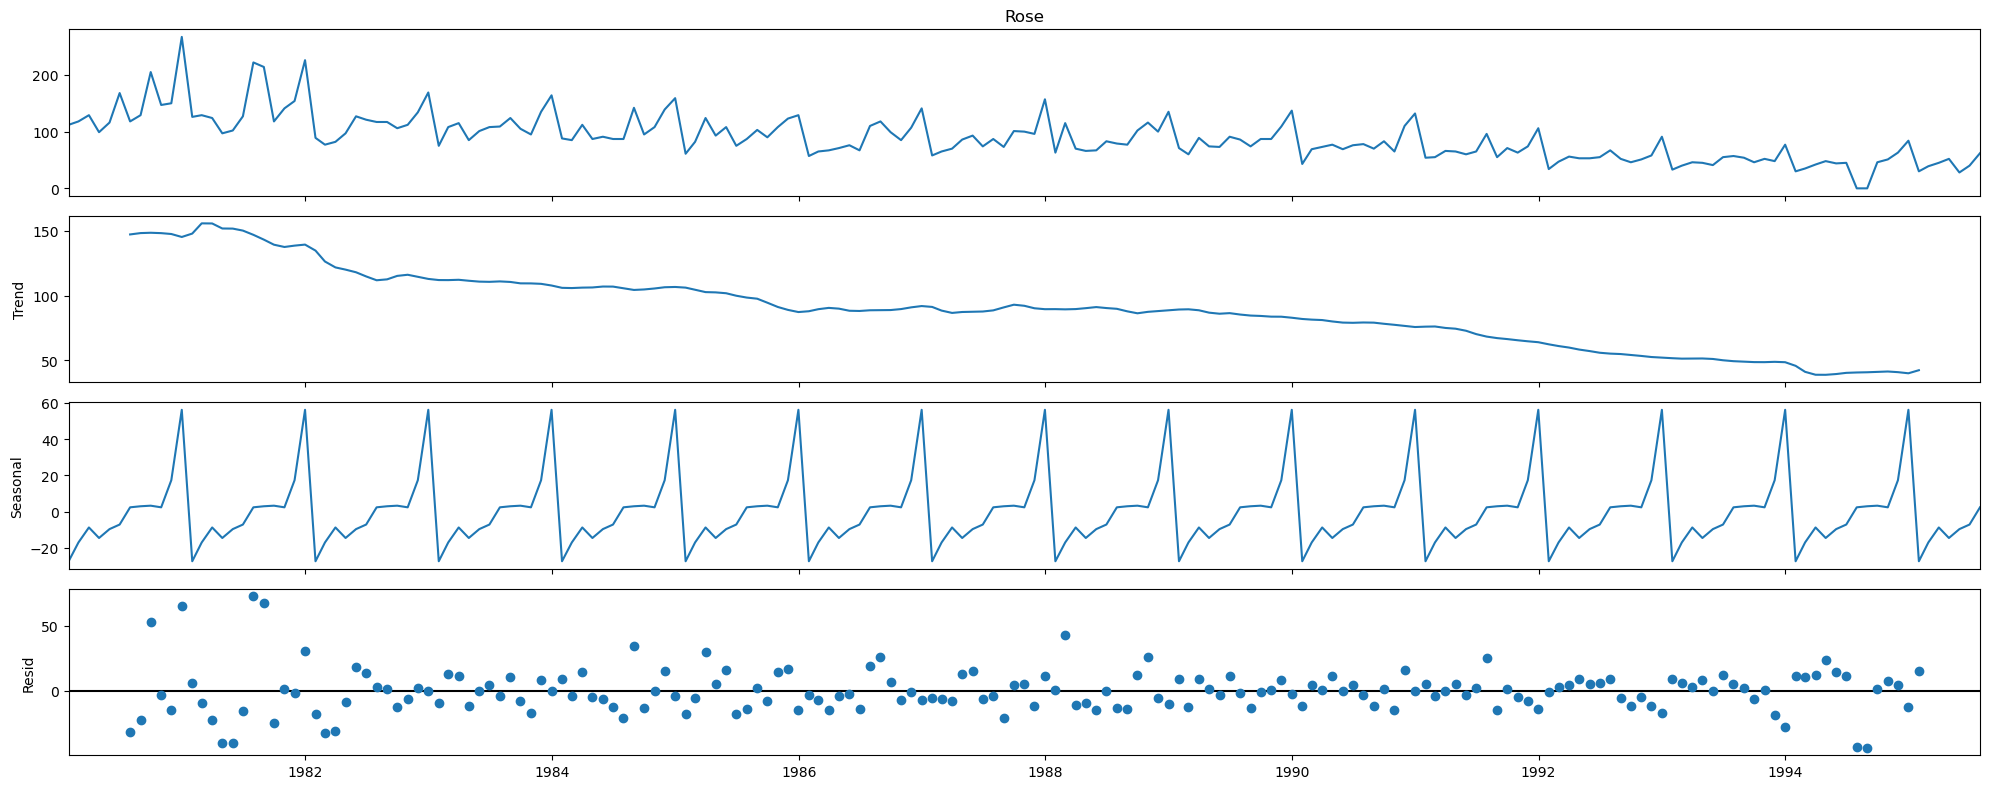

In [38]:
sd2=seasonal_decompose(df3['Rose'],model='additive')
sd2.plot();

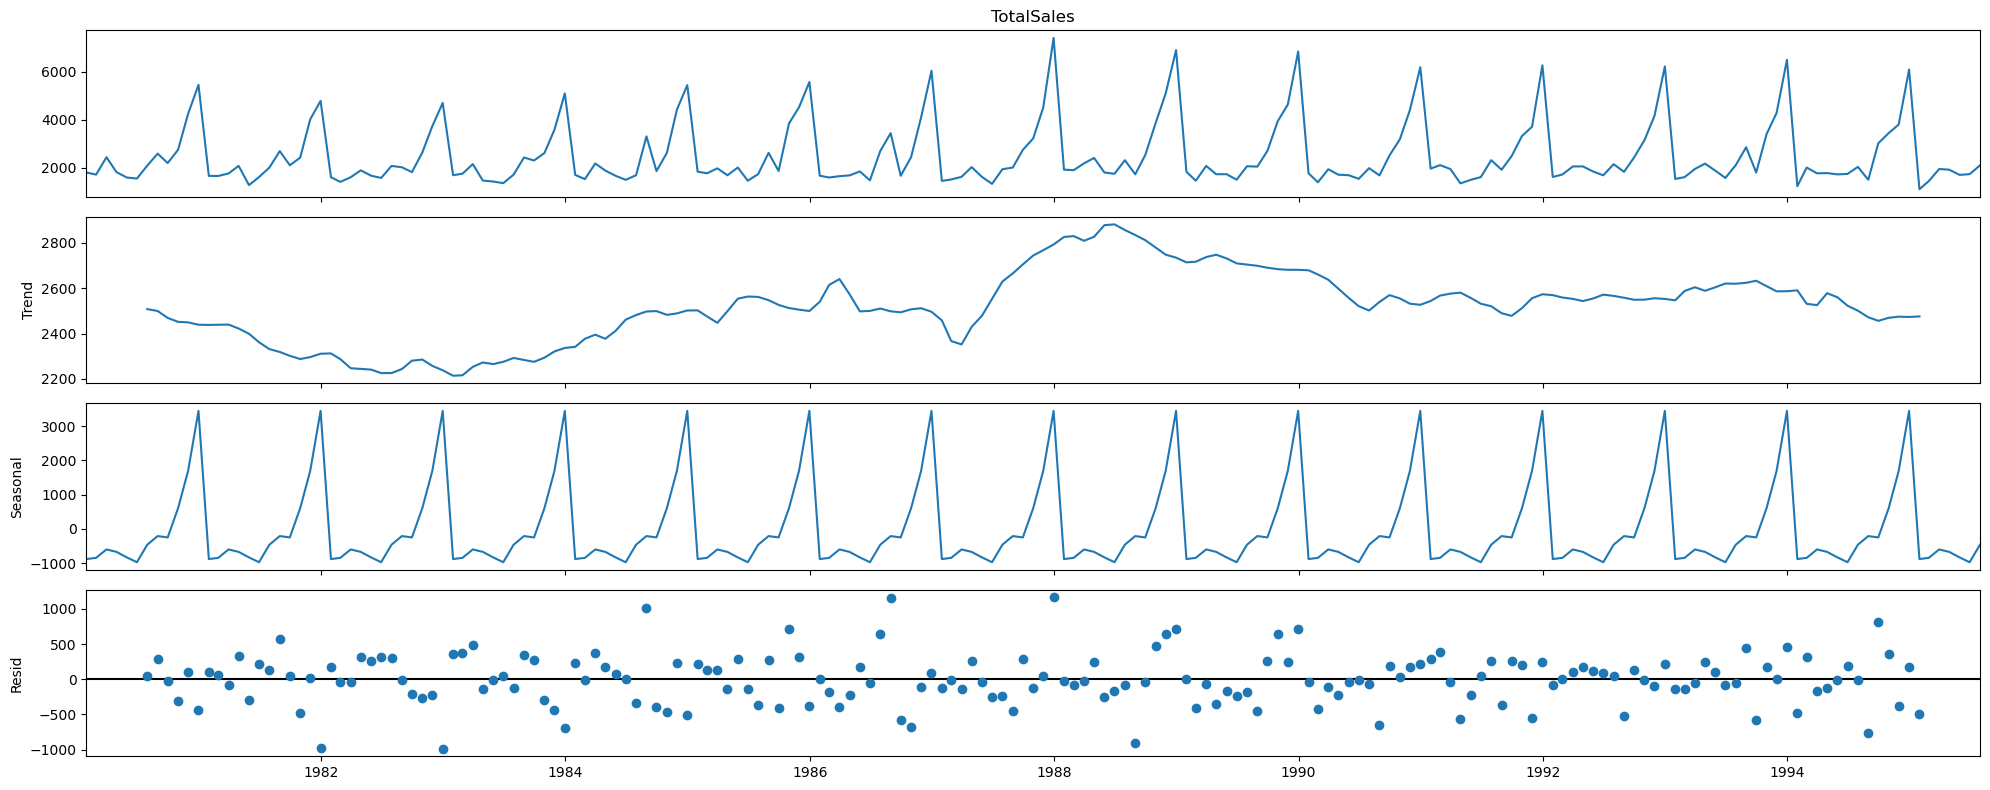

In [39]:
sd3=seasonal_decompose(df3['TotalSales'],model='additive')
sd3.plot();

Train test split

In [40]:
split_point=int(len(df3)*0.7)
train=df3.iloc[:split_point]
test=df3.iloc[split_point:]

Linear Regression

In [41]:
print(train.shape)
print(test.shape)

(130, 3)
(57, 3)


In [42]:
train_time=[i+1 for i in range (len(train))]
test_time=[i+131 for i in range (len(test))]

In [43]:
lr_train=train.copy()
lr_test=test.copy()
lr_train['time']=train_time
lr_test['time']=test_time

In [44]:
lr1=LinearRegression()
lr1.fit(lr_train[['time']],lr_train['Sparkling'])
lr2=LinearRegression()
lr2.fit(lr_train[['time']],lr_train['Rose'])
lr3=LinearRegression()
lr3.fit(lr_train[['time']],lr_train['TotalSales'])

LinearRegression()

In [45]:
lr_test['reg1']=lr1.predict(lr_test[['time']])
lr_test['reg2']=lr2.predict(lr_test[['time']])
lr_test['reg3']=lr3.predict(lr_test[['time']])

<Axes: xlabel='Date'>

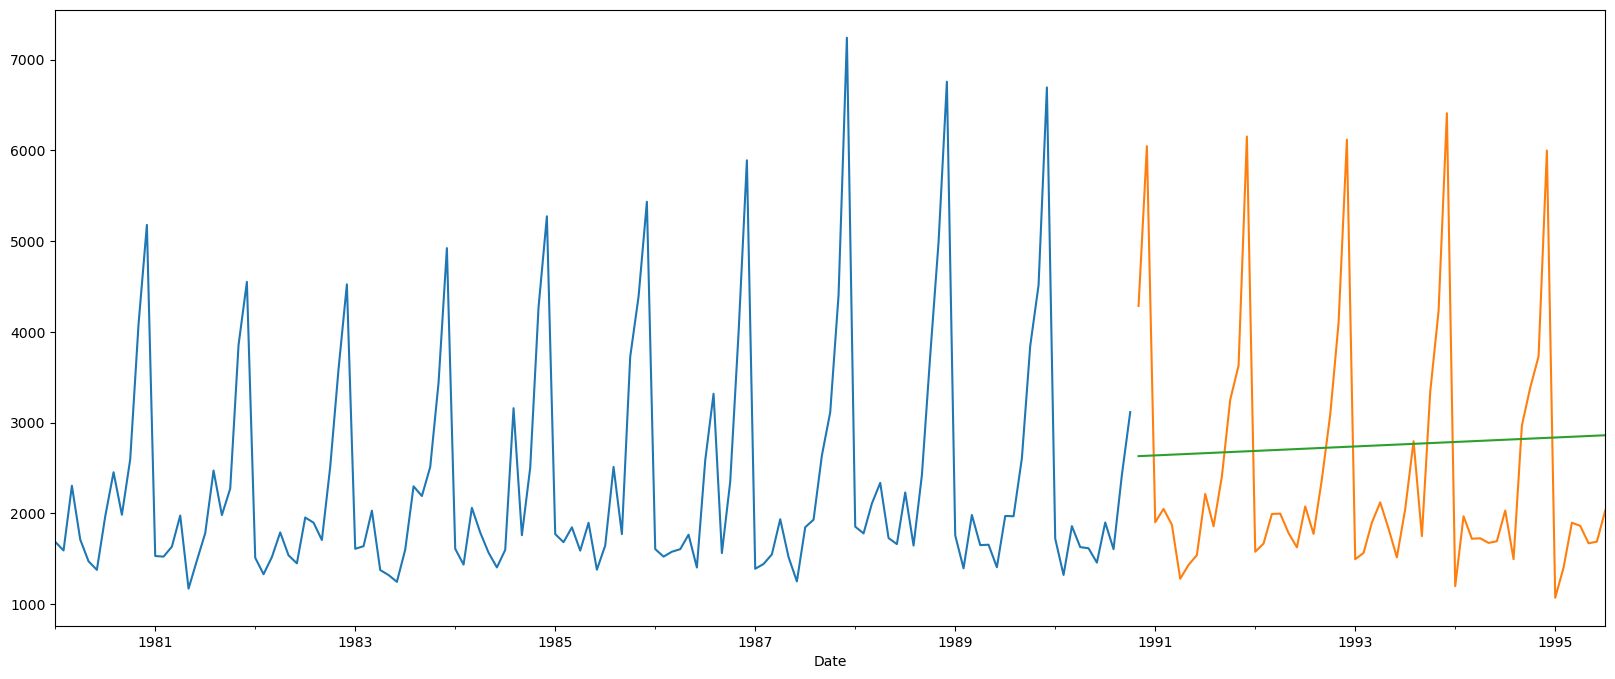

In [46]:
lr_train['Sparkling'].plot()
lr_test['Sparkling'].plot()
lr_test['reg1'].plot()

<Axes: xlabel='Date'>

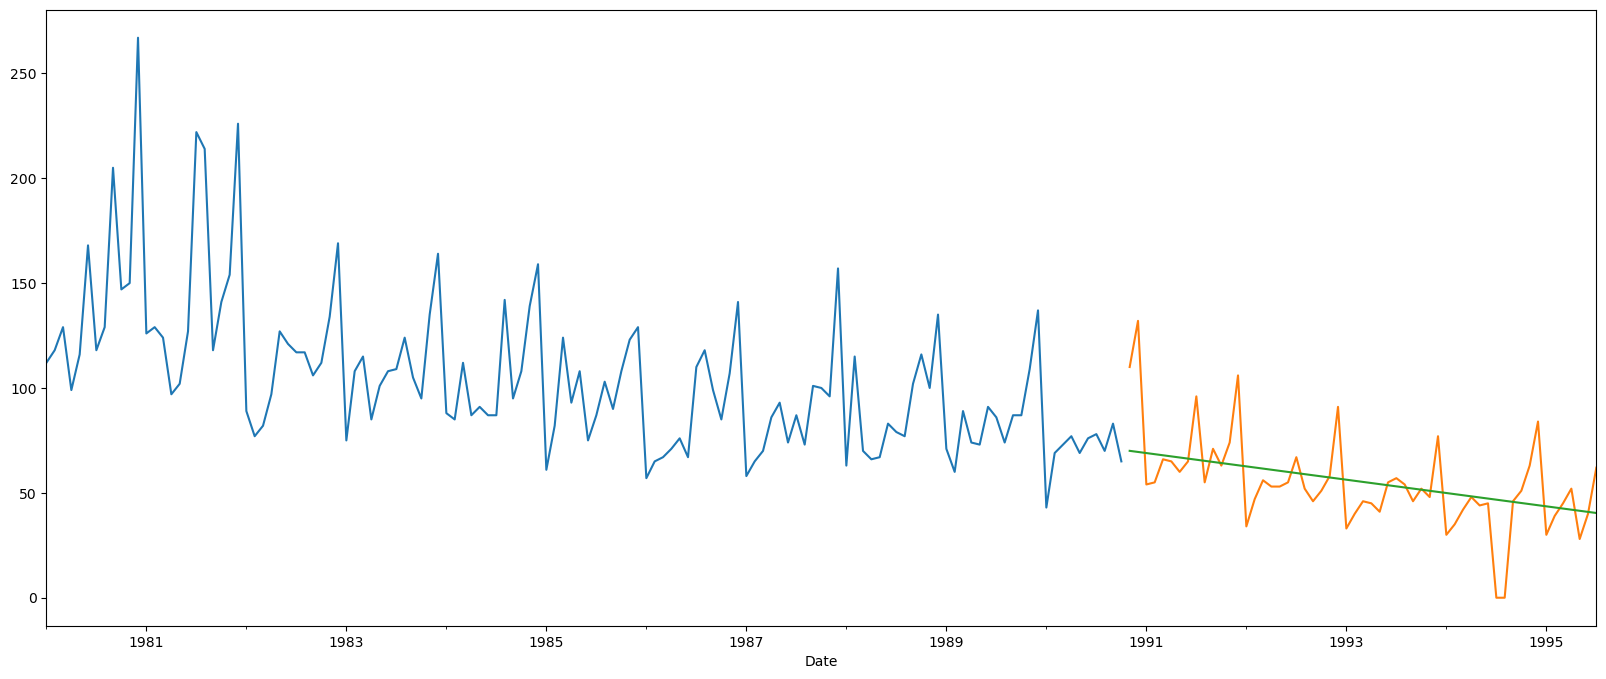

In [47]:
lr_train['Rose'].plot()
lr_test['Rose'].plot()
lr_test['reg2'].plot()

<Axes: xlabel='Date'>

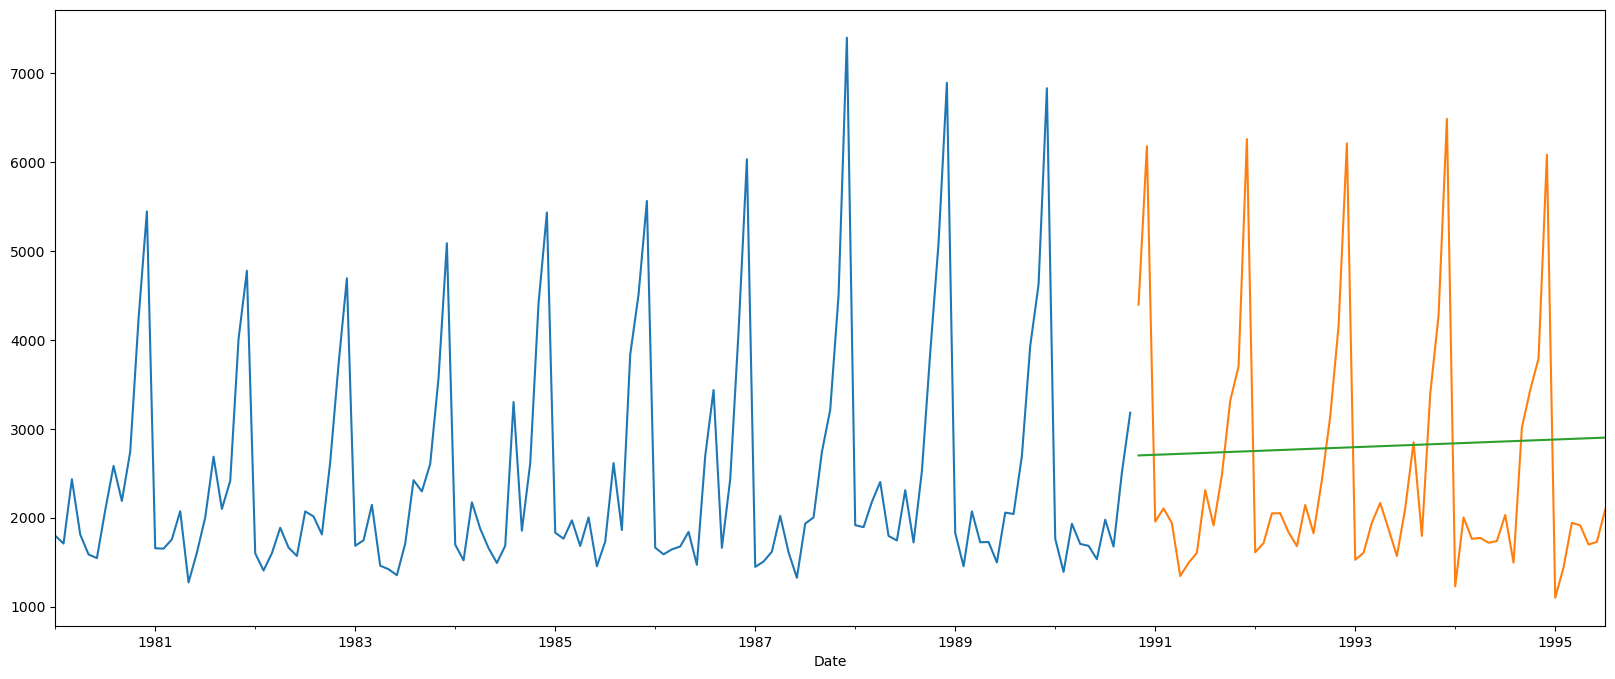

In [48]:
lr_train['TotalSales'].plot()
lr_test['TotalSales'].plot()
lr_test['reg3'].plot()

In [49]:
rmse1=mean_squared_error(lr_test['Sparkling'],lr_test['reg1'],squared=False)
rmse2=mean_squared_error(lr_test['Rose'],lr_test['reg2'],squared=False)
rmse3=mean_squared_error(lr_test['TotalSales'],lr_test['reg3'],squared=False)

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [50]:
print(rmse1)
print(rmse2)
print(rmse3)

1392.438304864264
19.416328561202054
1406.8517363857418


Simple Average

In [51]:
SA_train=train.copy()
SA_test=test.copy()

In [52]:
SA_test['mean1']=SA_train['Sparkling'].mean()
SA_test['mean2']=SA_train['Rose'].mean()
SA_test['mean3']=SA_train['TotalSales'].mean()

<Axes: xlabel='Date'>

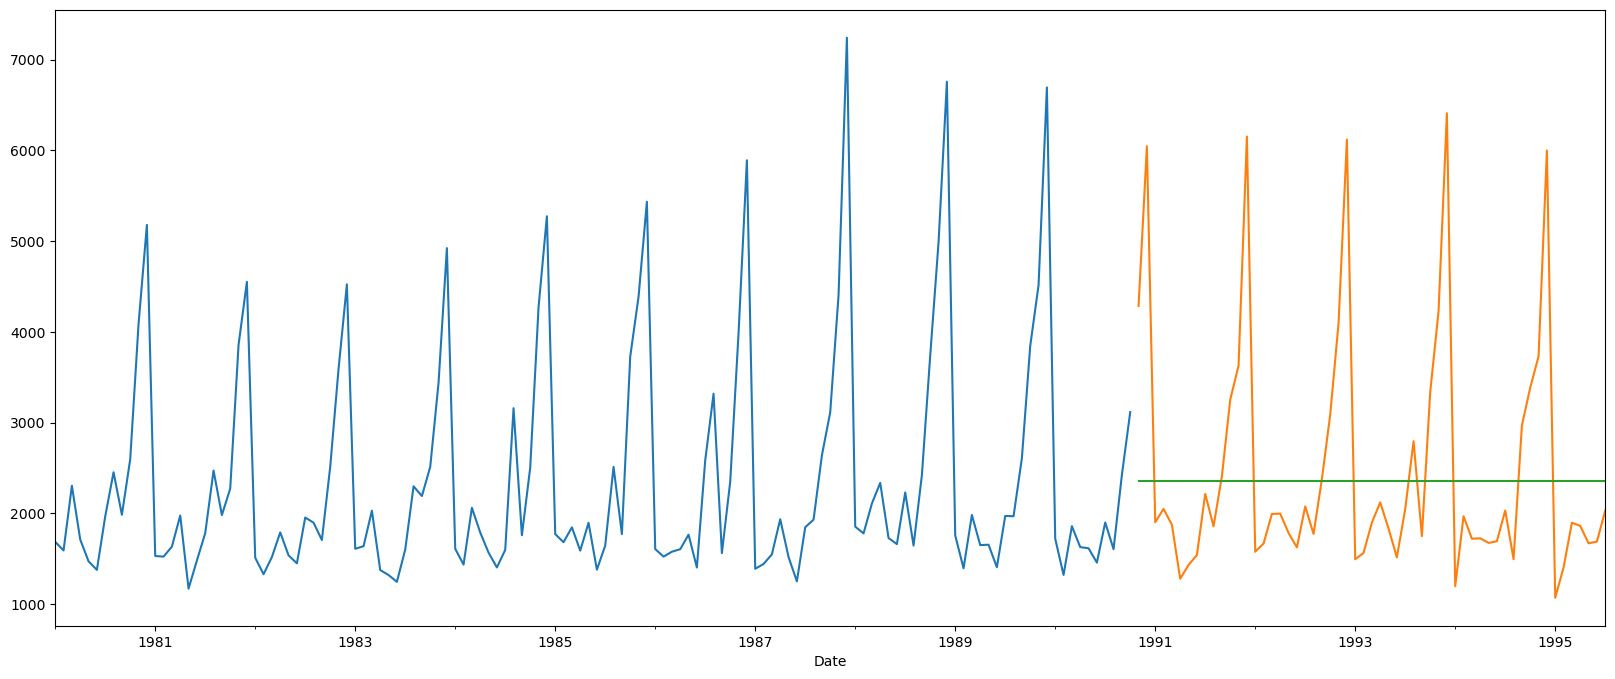

In [53]:
SA_train['Sparkling'].plot()
SA_test['Sparkling'].plot()
SA_test['mean1'].plot()

<Axes: xlabel='Date'>

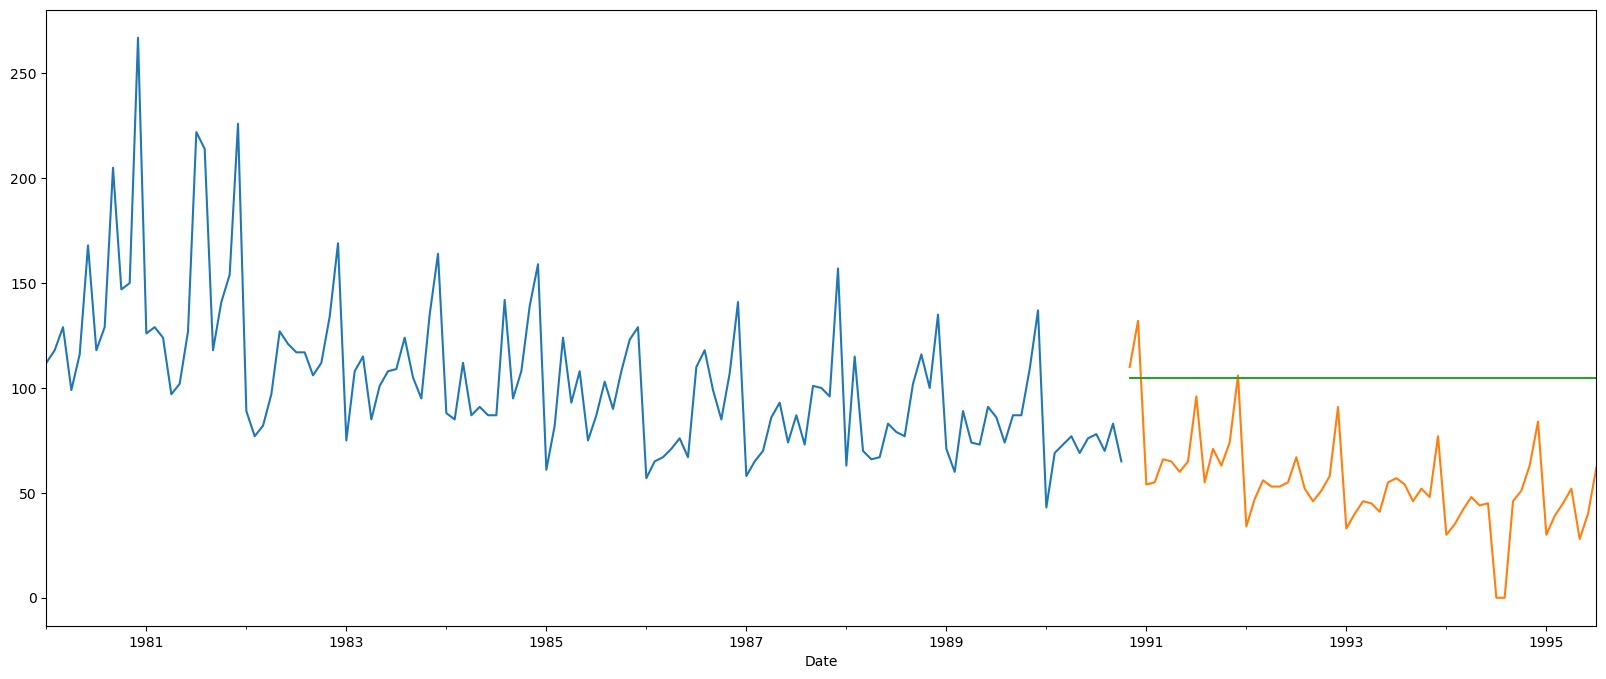

In [54]:
SA_train['Rose'].plot()
SA_test['Rose'].plot()
SA_test['mean2'].plot()

<Axes: xlabel='Date'>

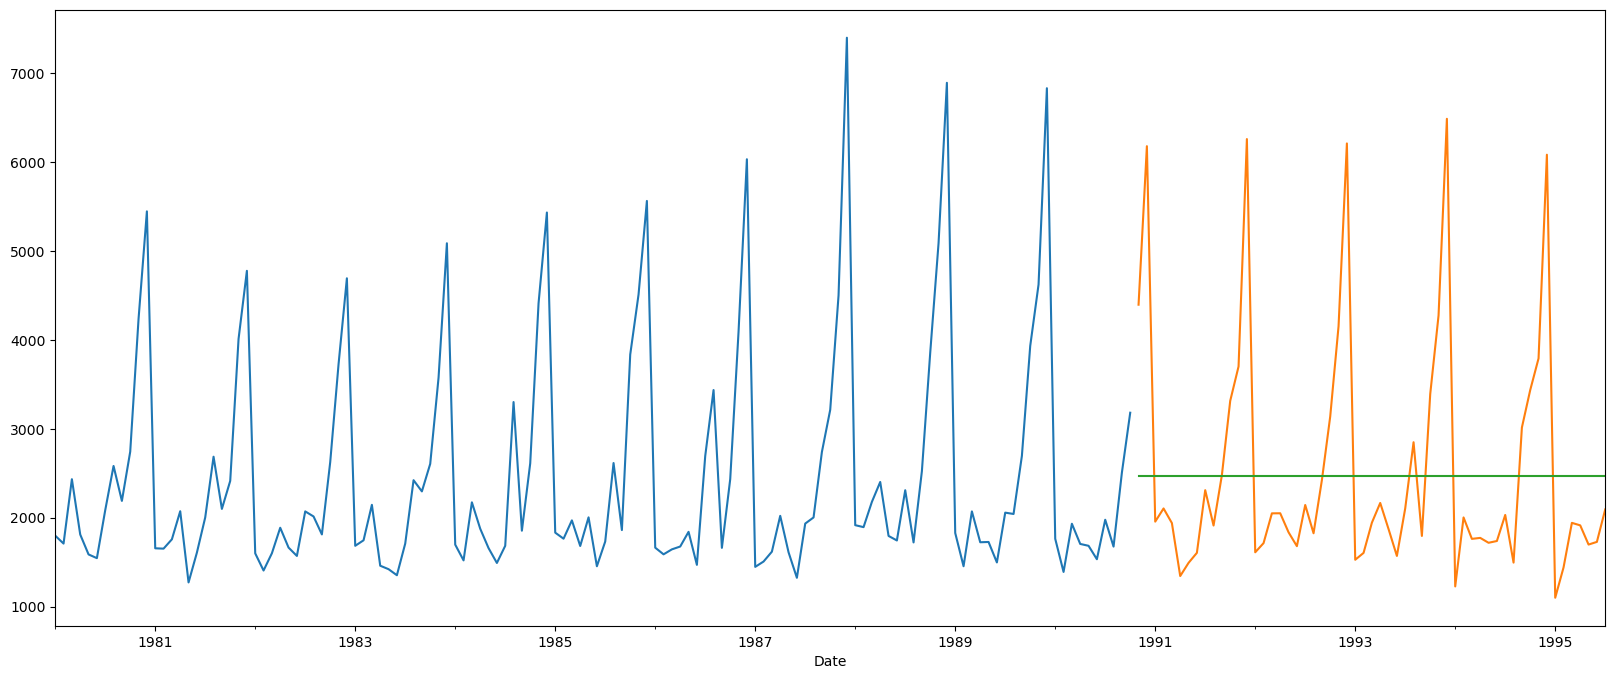

In [55]:
SA_train['TotalSales'].plot()
SA_test['TotalSales'].plot()
SA_test['mean3'].plot()

In [56]:
rmse4=mean_squared_error(SA_test['Sparkling'],SA_test['mean1'],squared=False)
rmse5=mean_squared_error(SA_test['Rose'],SA_test['mean2'],squared=False)
rmse6=mean_squared_error(SA_test['TotalSales'],SA_test['mean3'],squared=False)

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [57]:
print(rmse4)
print(rmse5)
print(rmse6)

1368.7467168662013
54.85131606703988
1380.0129462620737


Moving Average

In [58]:
MA=df3.copy()

In [59]:
MA['T2_S']=MA['Sparkling'].rolling(2).mean()
MA['T4_S']=MA['Sparkling'].rolling(4).mean()
MA['T6_S']=MA['Sparkling'].rolling(6).mean()
MA['T9_S']=MA['Sparkling'].rolling(9).mean()

In [60]:
MA['T2_R']=MA['Rose'].rolling(2).mean()
MA['T4_R']=MA['Rose'].rolling(4).mean()
MA['T6_R']=MA['Rose'].rolling(6).mean()
MA['T9_R']=MA['Rose'].rolling(9).mean()

In [61]:
MA['T2_T']=MA['TotalSales'].rolling(2).mean()
MA['T4_T']=MA['TotalSales'].rolling(4).mean()
MA['T6_T']=MA['TotalSales'].rolling(6).mean()
MA['T9_T']=MA['TotalSales'].rolling(9).mean()

In [62]:
split_point=int(len(MA)*0.7)
MA_train=MA.iloc[:split_point]
MA_test=MA.iloc[split_point:]

<Axes: xlabel='Date'>

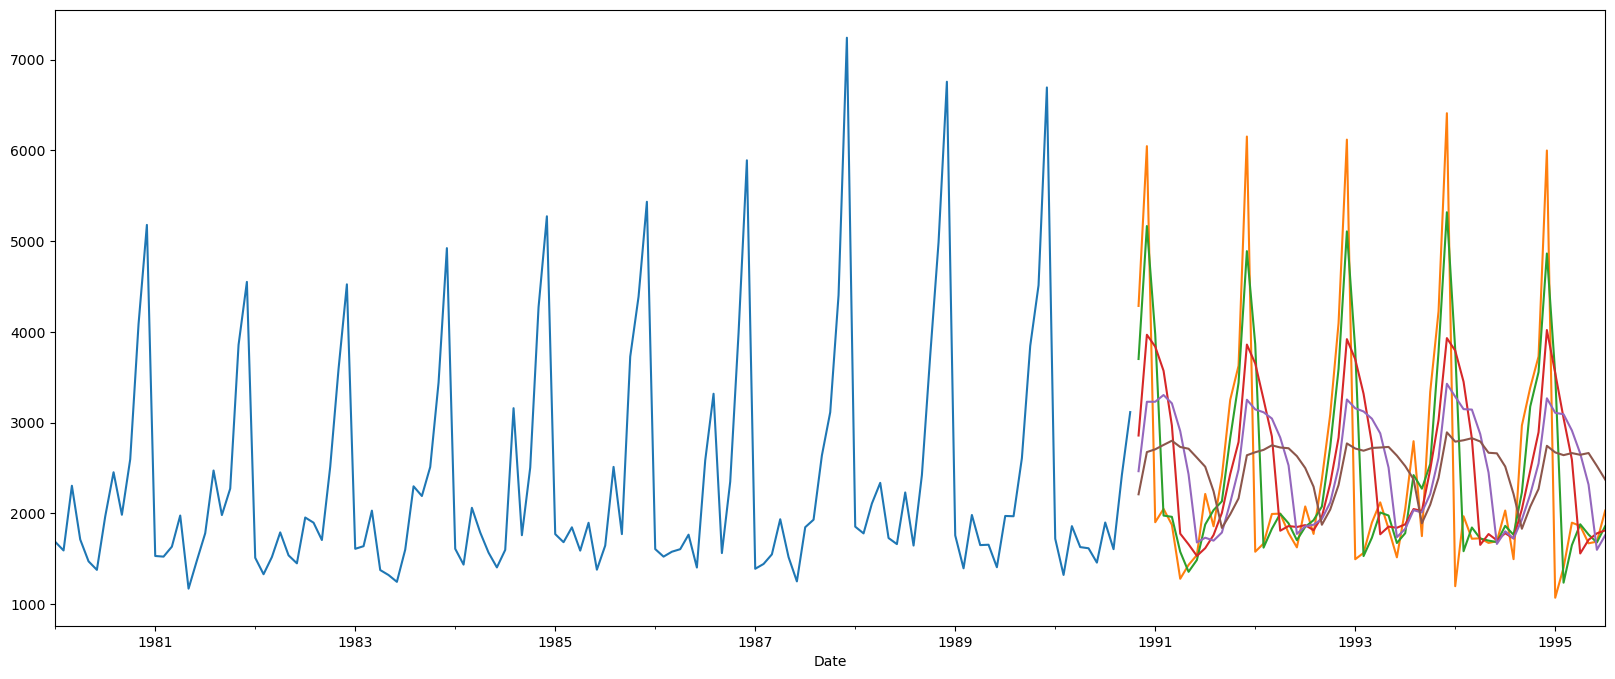

In [63]:
MA_train['Sparkling'].plot()
MA_test['Sparkling'].plot()
MA_test['T2_S'].plot()
MA_test['T4_S'].plot()
MA_test['T6_S'].plot()
MA_test['T9_S'].plot()

<Axes: xlabel='Date'>

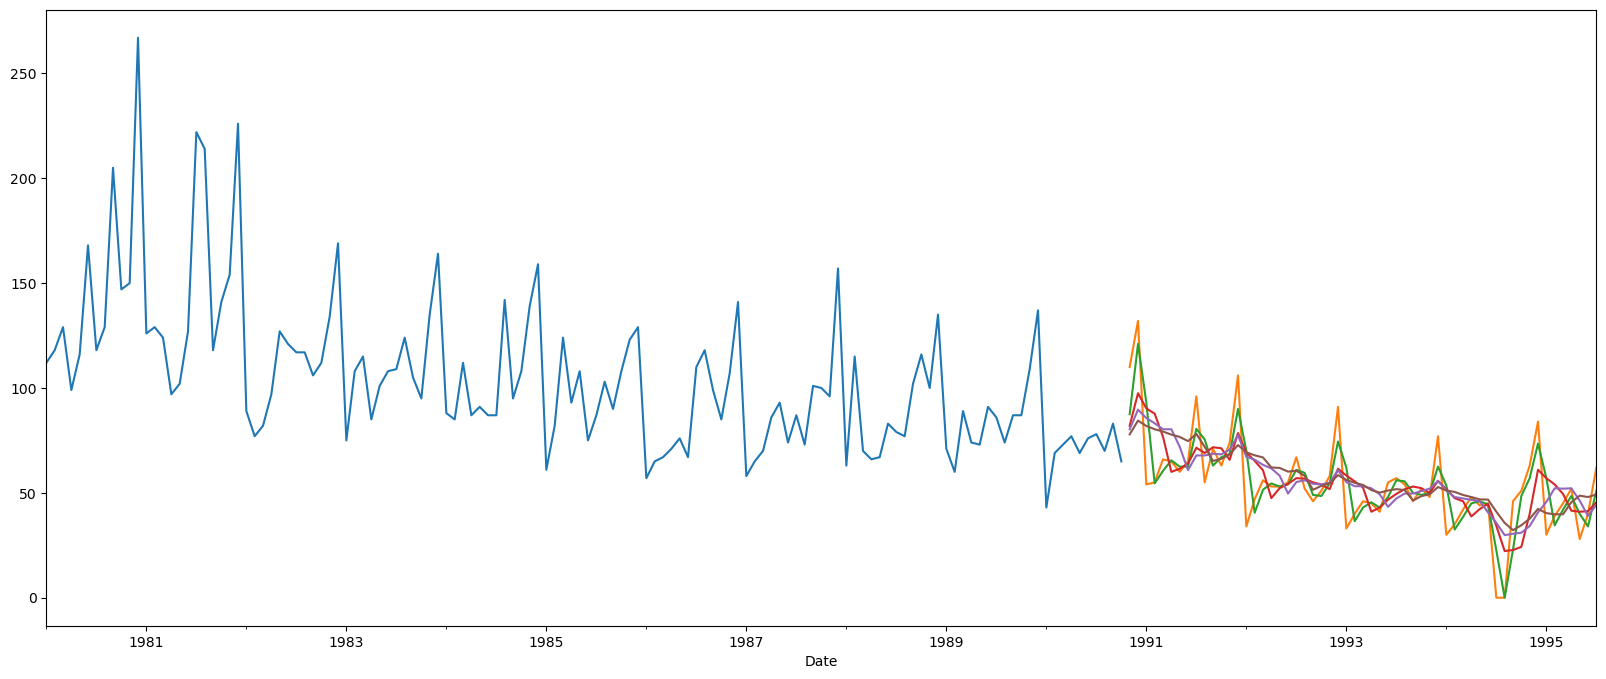

In [64]:
MA_train['Rose'].plot()
MA_test['Rose'].plot()
MA_test['T2_R'].plot()
MA_test['T4_R'].plot()
MA_test['T6_R'].plot()
MA_test['T9_R'].plot()

<Axes: xlabel='Date'>

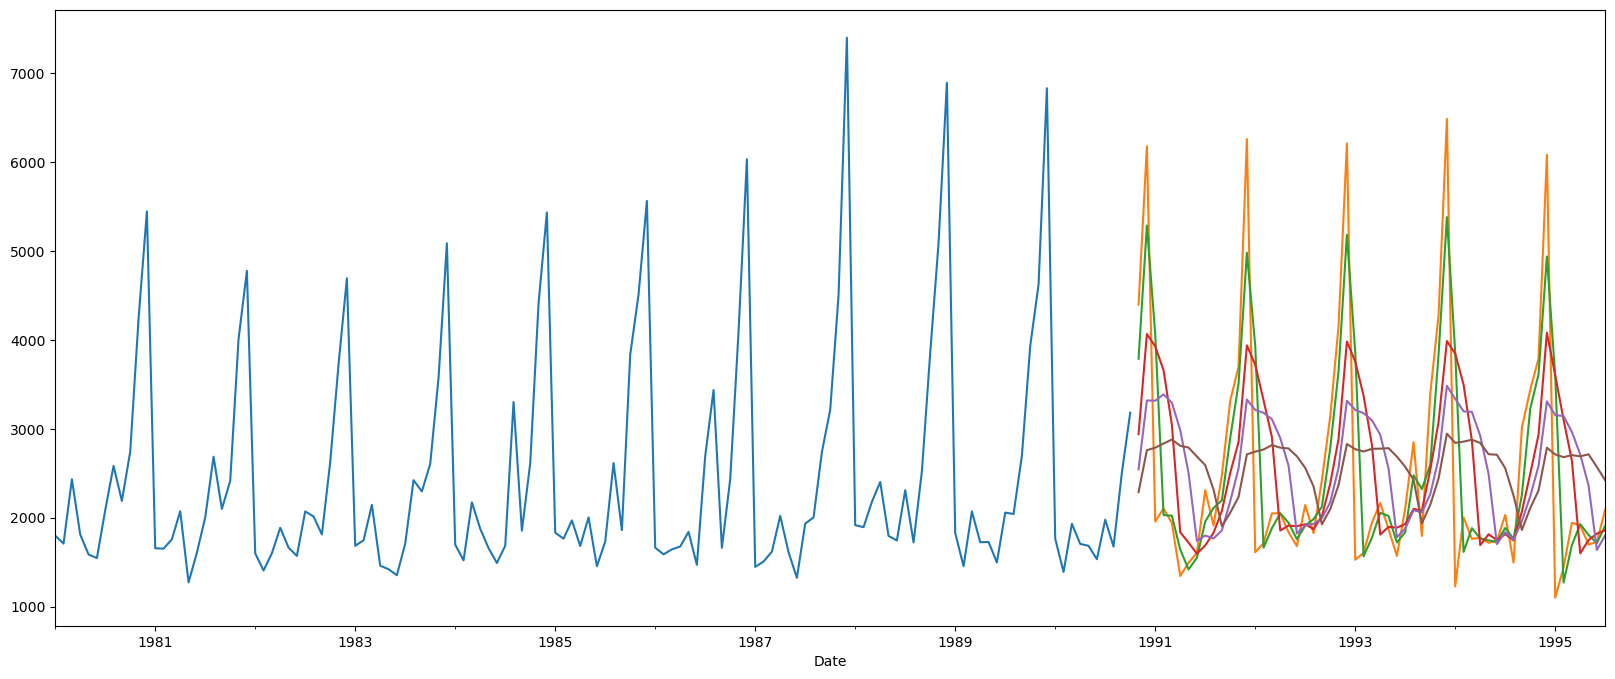

In [65]:
MA_train['TotalSales'].plot()
MA_test['TotalSales'].plot()
MA_test['T2_T'].plot()
MA_test['T4_T'].plot()
MA_test['T6_T'].plot()
MA_test['T9_T'].plot()

In [66]:
rmse7=mean_squared_error(MA_test['Sparkling'],MA_test['T2_S'],squared=False)
rmse8=mean_squared_error(MA_test['Sparkling'],MA_test['T4_S'],squared=False)
rmse9=mean_squared_error(MA_test['Sparkling'],MA_test['T6_S'],squared=False)
rmse10=mean_squared_error(MA_test['Sparkling'],MA_test['T9_S'],squared=False)

rmse11=mean_squared_error(MA_test['Rose'],MA_test['T2_R'],squared=False)
rmse12=mean_squared_error(MA_test['Rose'],MA_test['T4_R'],squared=False)
rmse13=mean_squared_error(MA_test['Rose'],MA_test['T6_R'],squared=False)
rmse14=mean_squared_error(MA_test['Rose'],MA_test['T9_R'],squared=False)

rmse15=mean_squared_error(MA_test['TotalSales'],MA_test['T2_T'],squared=False)
rmse16=mean_squared_error(MA_test['TotalSales'],MA_test['T4_T'],squared=False)
rmse17=mean_squared_error(MA_test['TotalSales'],MA_test['T6_T'],squared=False)
rmse18=mean_squared_error(MA_test['TotalSales'],MA_test['T9_T'],squared=False)

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To cal

In [67]:
print(rmse7)
print(rmse8)
print(rmse9)
print(rmse10)

print(rmse11)
print(rmse12)
print(rmse13)
print(rmse14)

print(rmse15)
print(rmse16)
print(rmse17)
print(rmse18)

811.1789368221167
1184.2132946361405
1337.2005237587744
1422.653280801376
12.546929448932564
17.148953985798013
18.039241392572283
18.4228601483334
821.6683712305725
1197.9611064220742
1351.1553272379851
1436.8193709370785


Simple_Exponential_Smoothing

In [68]:
se_train=train.copy()
se_test=test.copy()

In [69]:
m1 = SimpleExpSmoothing(se_train['Sparkling'])
r1 = m1.fit(optimized=True)

m2=SimpleExpSmoothing(se_train['Rose'])
r2=m2.fit(optimized=True)

m3=SimpleExpSmoothing(se_train['TotalSales'])
r3=m3.fit(optimized=True)

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [70]:
se_test['pred1']=r1.forecast(steps=len(se_test['Sparkling']))
se_test['pred2']=r2.forecast(steps=len(se_test['Rose']))
se_test['pred3']=r3.forecast(steps=len(se_test['TotalSales']))

<Axes: xlabel='Date'>

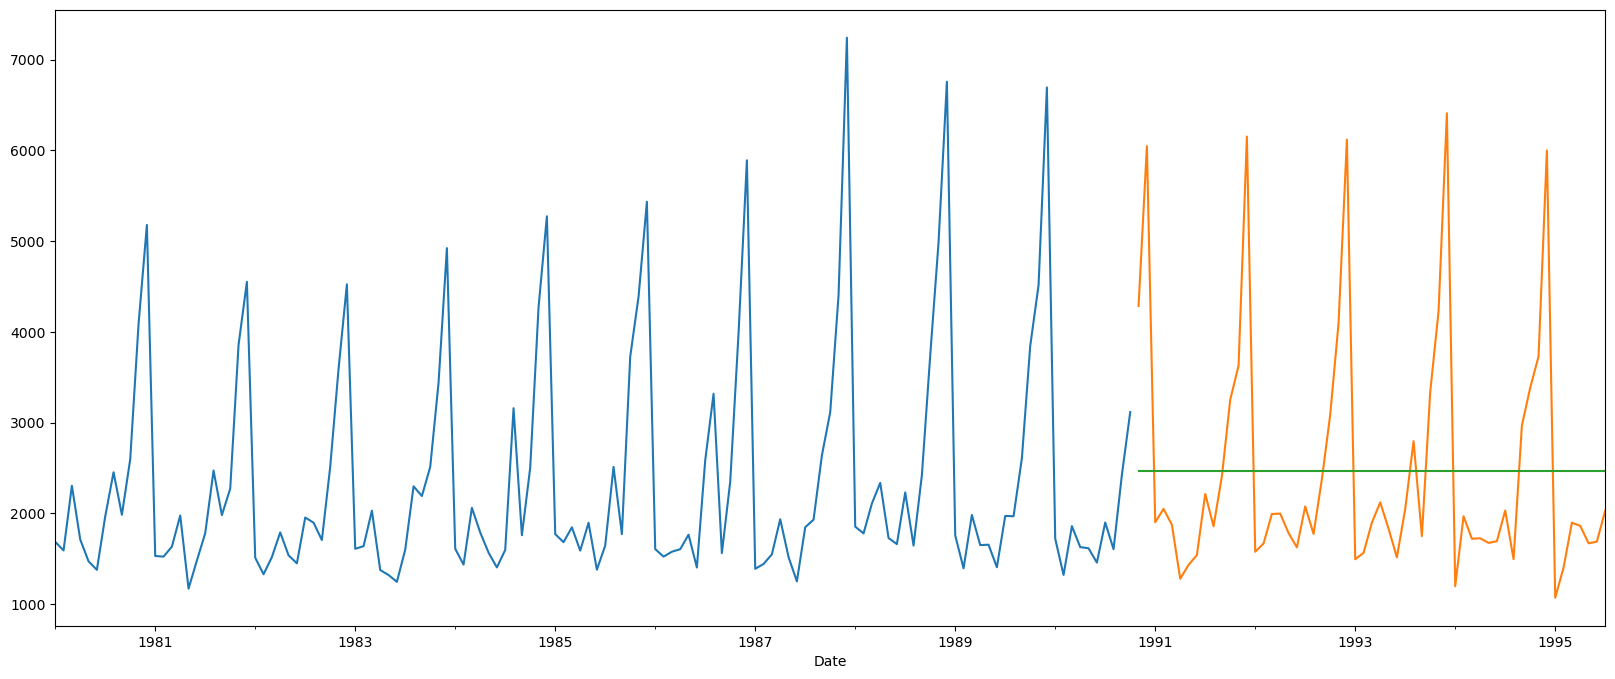

In [71]:
se_train['Sparkling'].plot()
se_test['Sparkling'].plot()
se_test['pred1'].plot()

<Axes: xlabel='Date'>

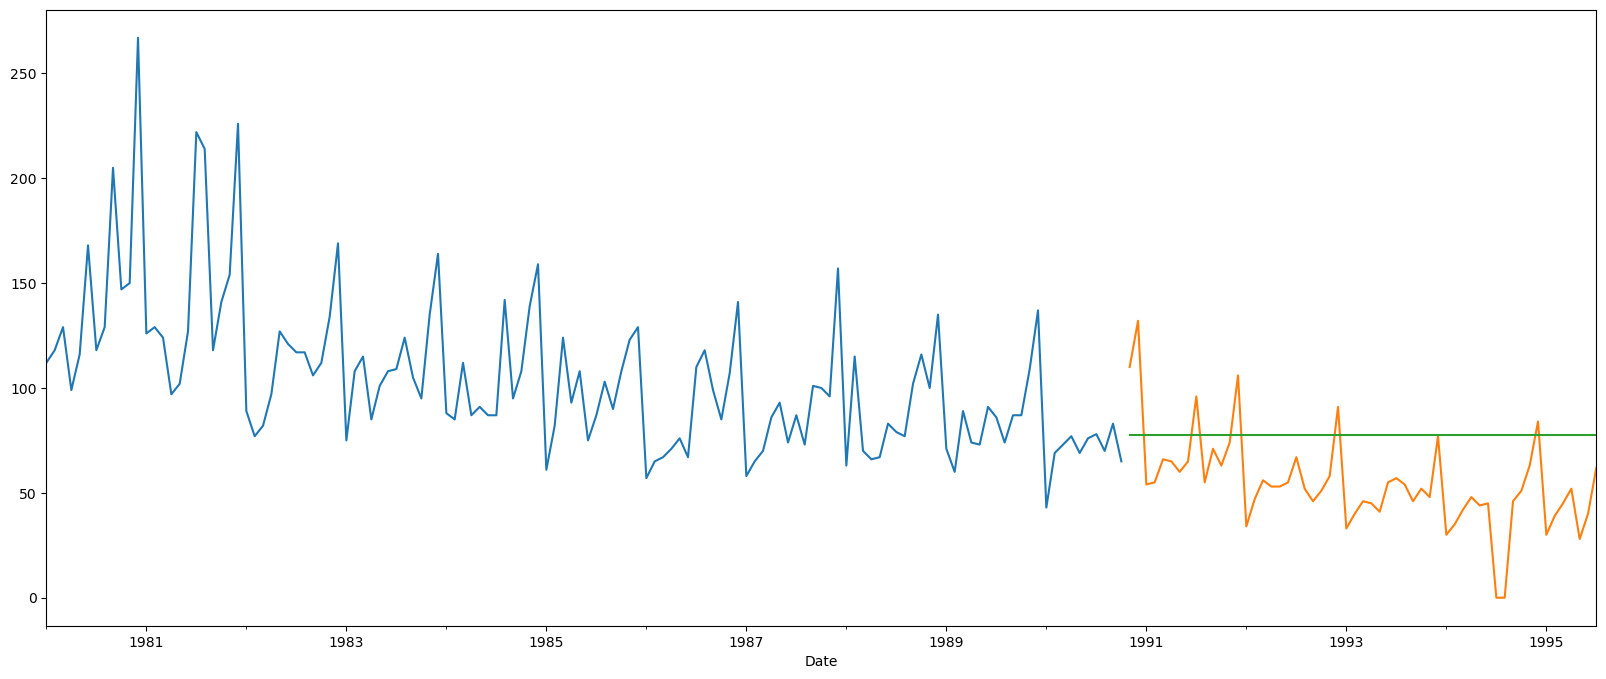

In [72]:
se_train['Rose'].plot()
se_test['Rose'].plot()
se_test['pred2'].plot()

<Axes: xlabel='Date'>

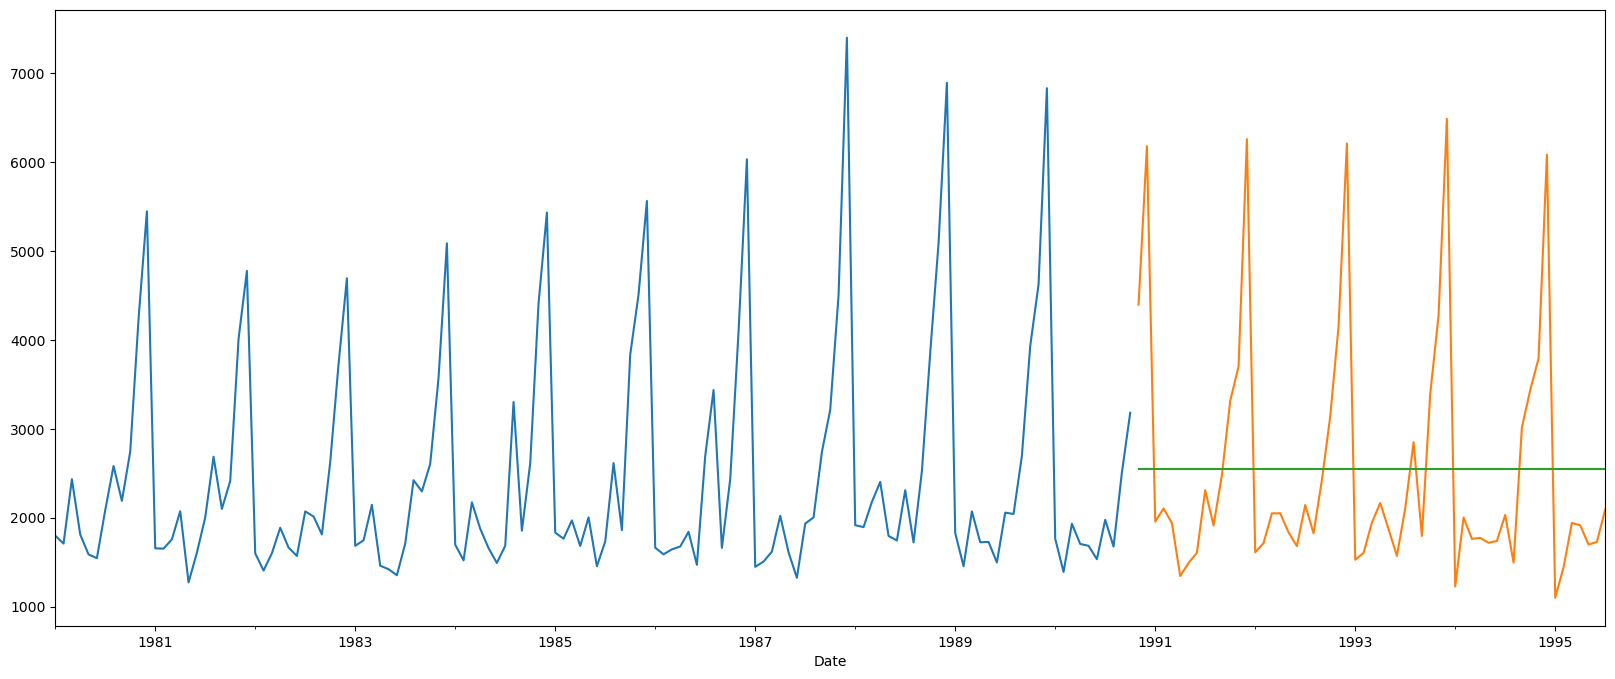

In [73]:
se_train['TotalSales'].plot()
se_test['TotalSales'].plot()
se_test['pred3'].plot()

In [74]:
rmse19=mean_squared_error(se_test['Sparkling'],se_test['pred1'],squared=False)
rmse20=mean_squared_error(se_test['Rose'],se_test['pred2'],squared=False)
rmse21=mean_squared_error(se_test['TotalSales'],se_test['pred3'],squared=False)

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [75]:
print(rmse19)
print(rmse20)
print(rmse21)

1362.4289494368052
32.0804478501081
1377.3997439144334


Double_Exponential_Smoothing

In [76]:
de_train=train.copy()
de_test=test.copy()

In [77]:
m4=Holt(de_train['Sparkling'])
r4=m4.fit(optimized=True)

m5=Holt(de_train['Rose'])
r5=m5.fit(optimized=True)

m6=Holt(de_train['TotalSales'])
r6=m6.fit(optimized=True)

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.

In [78]:
de_test['pred1']=r4.forecast(steps=len(de_test['Sparkling']))
de_test['pred2']=r5.forecast(steps=len(de_test['Rose']))
de_test['pred3']=r6.forecast(steps=len(de_test['TotalSales']))

<Axes: xlabel='Date'>

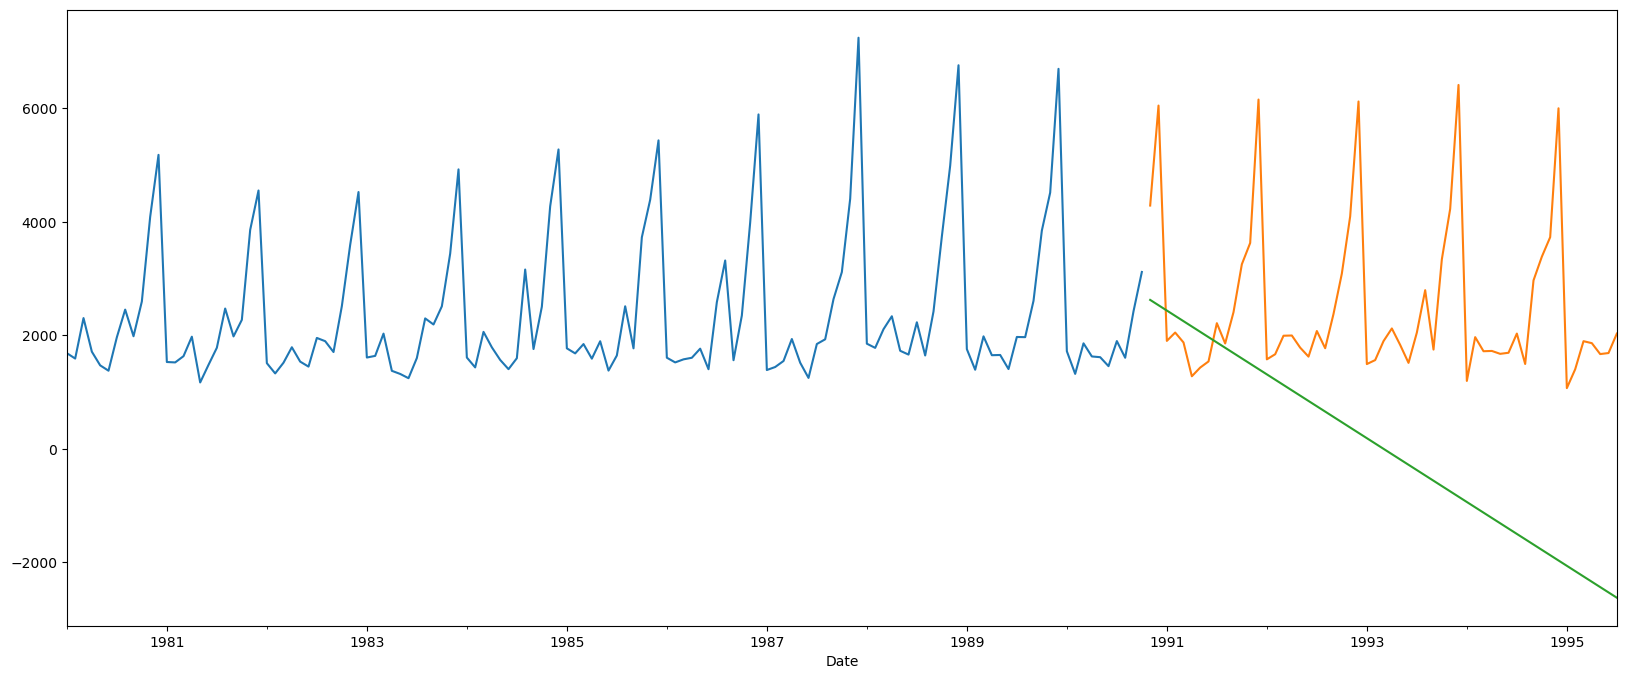

In [79]:
de_train['Sparkling'].plot()
de_test['Sparkling'].plot()
de_test['pred1'].plot()

<Axes: xlabel='Date'>

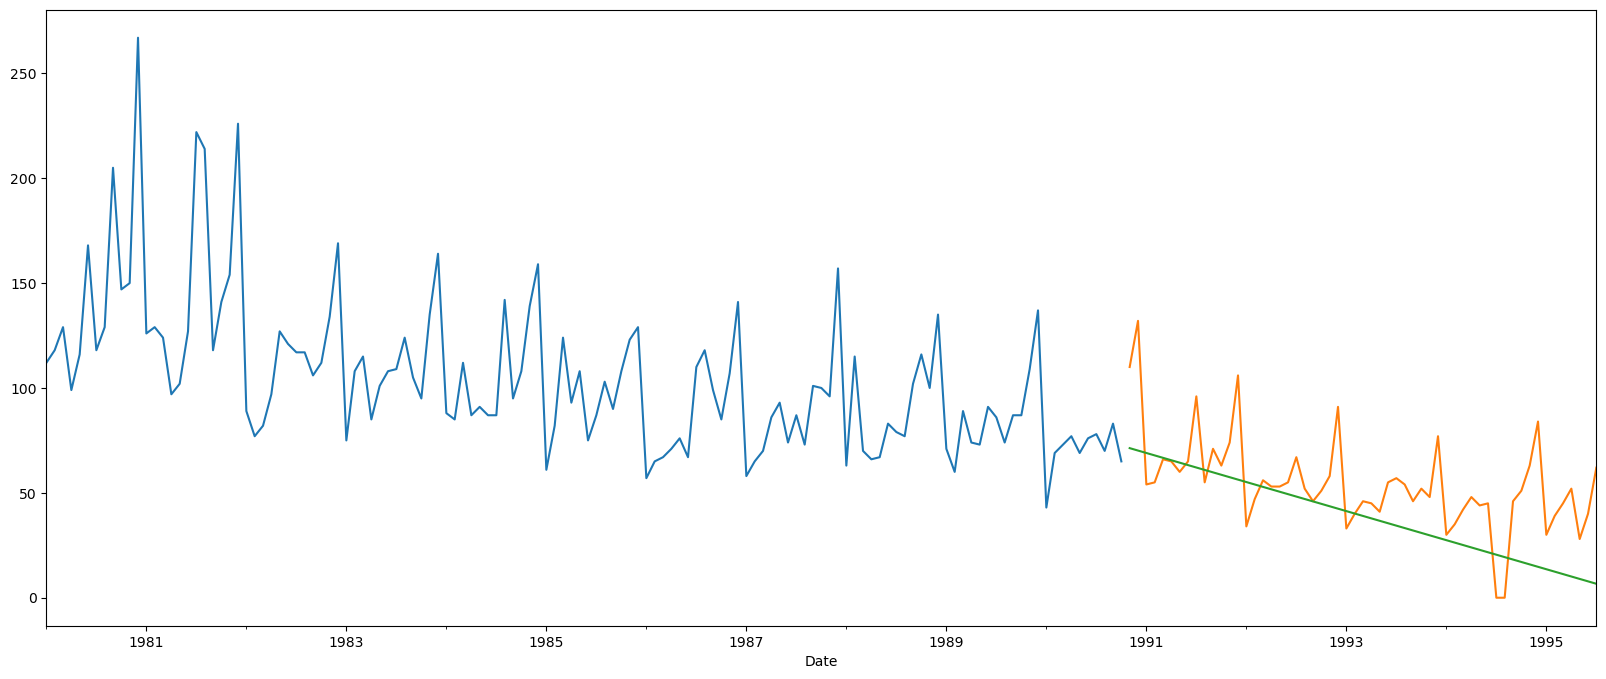

In [80]:
de_train['Rose'].plot()
de_test['Rose'].plot()
de_test['pred2'].plot()

<Axes: xlabel='Date'>

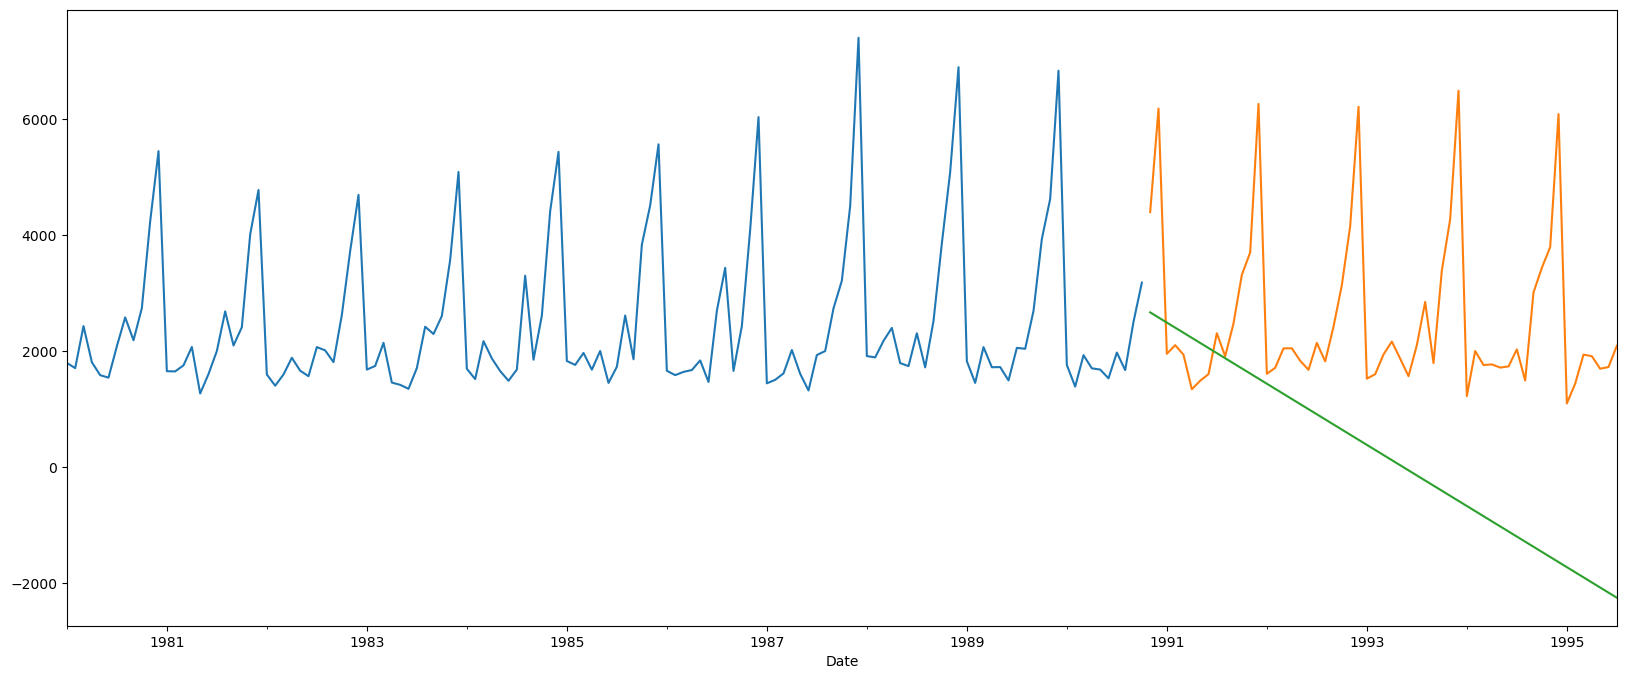

In [81]:
de_train['TotalSales'].plot()
de_test['TotalSales'].plot()
de_test['pred3'].plot()

In [82]:
rmse22=mean_squared_error(de_test['Sparkling'],de_test['pred1'],squared=False)
rmse23=mean_squared_error(de_test['Rose'],de_test['pred2'],squared=False)
rmse24=mean_squared_error(de_test['TotalSales'],de_test['pred3'],squared=False)

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [83]:
print(rmse22)
print(rmse23)
print(rmse24)

3173.262077625624
25.87614661829691
3009.6842785770637


Triple_Exponential_Smoothing

In [84]:
esa_train=train.copy()
esa_test=test.copy()

In [85]:
m7=ExponentialSmoothing(esa_train['Sparkling'],trend='additive',seasonal='additive')
r7=m7.fit(optimized=True)

m8=ExponentialSmoothing(esa_train['Rose'],trend='additive',seasonal='additive')
r8=m8.fit(optimized=True)

m9=ExponentialSmoothing(esa_train['TotalSales'],trend='additive',seasonal='additive')
r9=m9.fit(optimized=True)

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [86]:
esa_test['pred1']=r7.forecast(steps=len(esa_test['Sparkling']))
esa_test['pred2']=r8.forecast(steps=len(esa_test['Rose']))
esa_test['pred3']=r9.forecast(steps=len(esa_test['TotalSales']))

<Axes: xlabel='Date'>

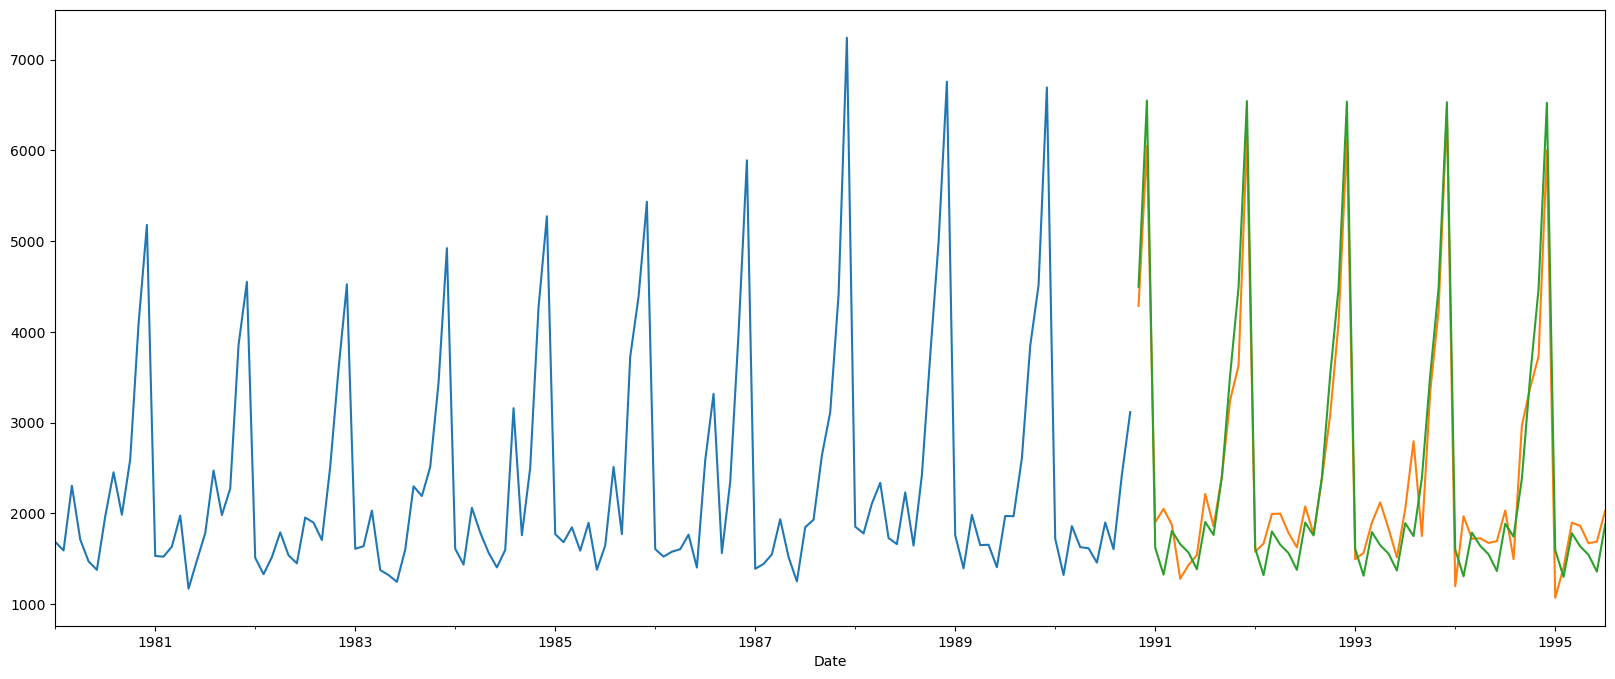

In [87]:
esa_train['Sparkling'].plot()
esa_test['Sparkling'].plot()
esa_test['pred1'].plot()

<Axes: xlabel='Date'>

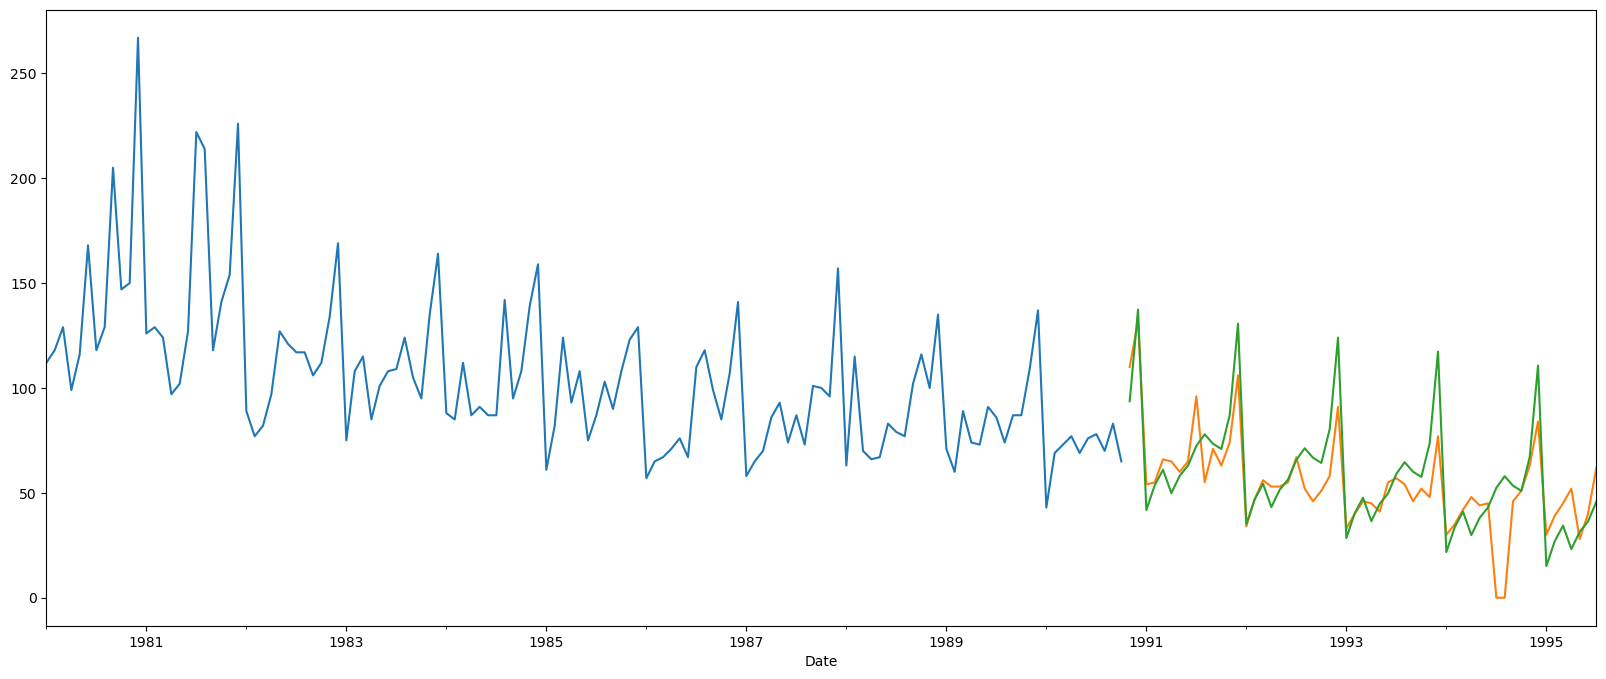

In [88]:
esa_train['Rose'].plot()
esa_test['Rose'].plot()
esa_test['pred2'].plot()

<Axes: xlabel='Date'>

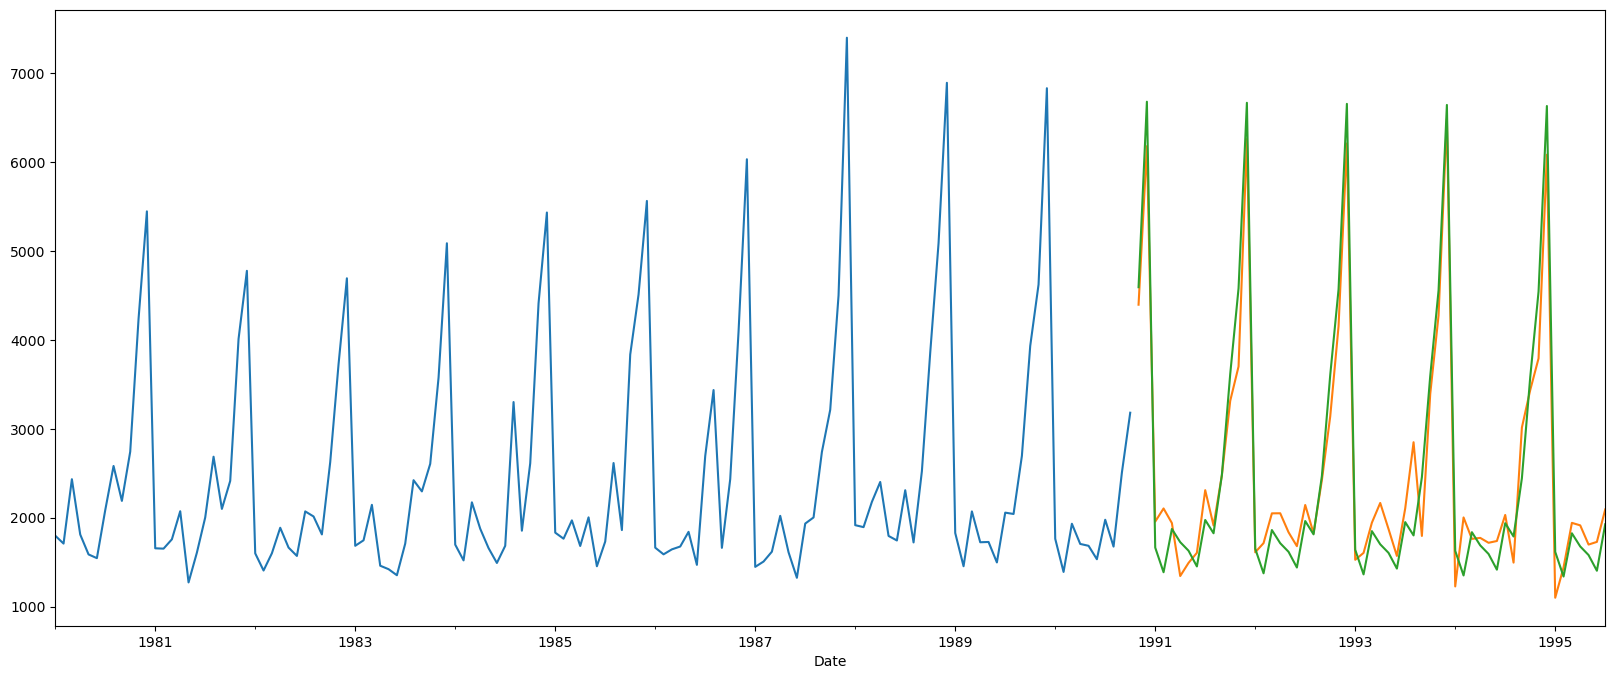

In [169]:
esa_train['TotalSales'].plot()
esa_test['TotalSales'].plot()
esa_test['pred3'].plot()

In [166]:
rmse25=mean_squared_error(esa_test['Sparkling'],esa_test['pred1'],squared=False)
rmse26=mean_squared_error(esa_test['Rose'],esa_test['pred2'],squared=False)
rmse27=mean_squared_error(esa_test['TotalSales'],esa_test['pred3'],squared=False)

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [167]:
print(rmse25)
print(rmse26)
print(rmse27)

366.8591560427043
17.277676983974306
370.7658598150161


In [91]:
esm_train=train.copy()
esm_test=test.copy()

In [92]:
m10=ExponentialSmoothing(esm_train['Sparkling'],trend='additive',seasonal='multiplicative')
r10=m10.fit(optimized=True)

m11=ExponentialSmoothing(esm_train['Rose'],trend='additive',seasonal='multiplicative')
r11=m11.fit(optimized=True)

m12=ExponentialSmoothing(esm_train['TotalSales'],trend='additive',seasonal='multiplicative')
r12=m12.fit(optimized=True)

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [93]:
esm_test['pred1']=r10.forecast(steps=len(esm_test['Sparkling']))
esm_test['pred2']=r11.forecast(steps=len(esm_test['Rose']))
esm_test['pred3']=r12.forecast(steps=len(esm_test['TotalSales']))                     

<Axes: xlabel='Date'>

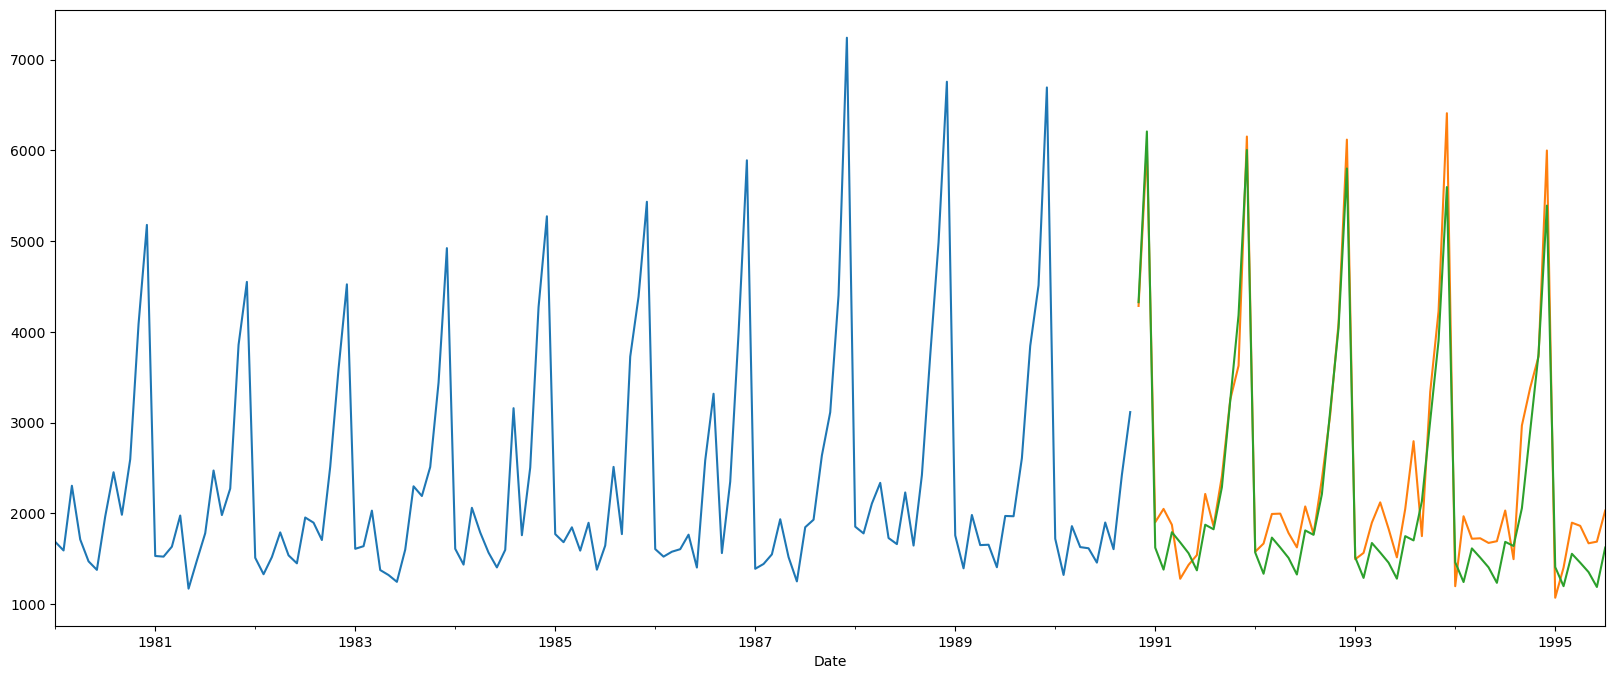

In [94]:
esm_train['Sparkling'].plot()
esm_test['Sparkling'].plot()
esm_test['pred1'].plot()

<Axes: xlabel='Date'>

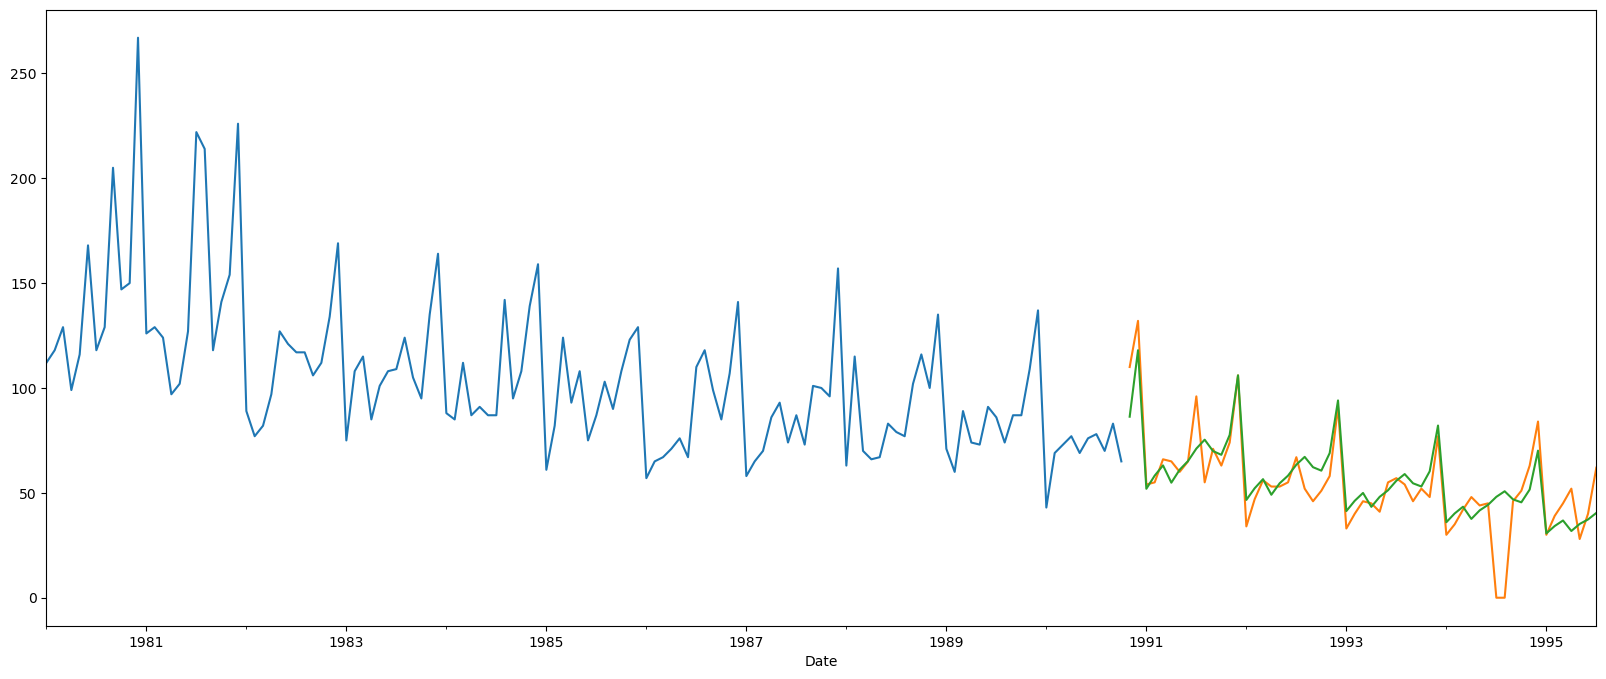

In [95]:
esm_train['Rose'].plot()
esm_test['Rose'].plot()
esm_test['pred2'].plot()

<Axes: xlabel='Date'>

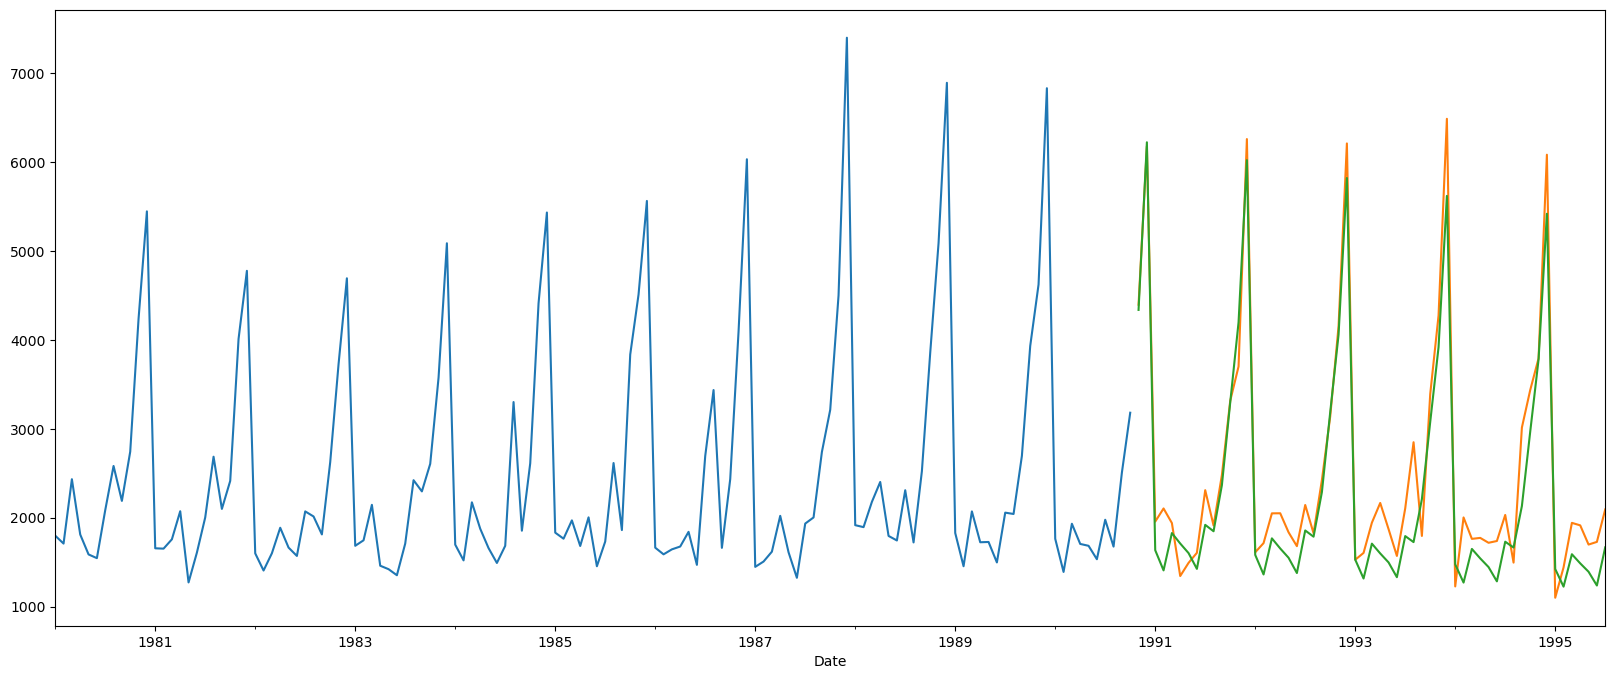

In [96]:
esm_train['TotalSales'].plot()
esm_test['TotalSales'].plot()
esm_test['pred3'].plot()

In [97]:
rmse28=mean_squared_error(esm_test['Sparkling'],esm_test['pred1'],squared=False)
rmse29=mean_squared_error(esm_test['Rose'],esm_test['pred2'],squared=False)
rmse30=mean_squared_error(esm_test['TotalSales'],esm_test['pred3'],squared=False)

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [98]:
print(rmse28)
print(rmse29)
print(rmse30)

381.6552716385202
13.121390790751786
390.7201319482511


Stationarity Check

In [99]:
s1=adfuller(df3['Sparkling'])
s2=adfuller(df3['Rose'])
s3=adfuller(df3['TotalSales'])
print(s1)
print(s2)
print(s3)

(-1.3604974548123354, 0.6010608871634863, 11, 175, {'1%': -3.4682803641749267, '5%': -2.8782017240816327, '10%': -2.5756525795918366}, 2573.1222090270685)
(-1.7159492779127274, 0.42291422953487834, 13, 173, {'1%': -3.4687256239864017, '5%': -2.8783961376954363, '10%': -2.57575634100705}, 1532.120995909302)
(-1.6369408669074703, 0.4638597218840875, 12, 174, {'1%': -3.4685016947910636, '5%': -2.8782983668563396, '10%': -2.57570415906989}, 2578.533283185116)


Making the data stationary

In [100]:
df3['Sparkling_diff']=df3['Sparkling'].diff().dropna()
df3['Rose_diff']=df3['Rose'].diff().dropna()
df3['TotalSales_diff']=df3['TotalSales'].diff().dropna()
df3['Sparkling_diff']=df3['Sparkling_diff'].replace(np.nan,0)
df3['Rose_diff']=df3['Rose_diff'].replace(np.nan,0)
df3['TotalSales_diff']=df3['TotalSales_diff'].replace(np.nan,0)

In [101]:
s1=adfuller(df3['Sparkling_diff'])
s2=adfuller(df3['Rose_diff'])
s3=adfuller(df3['TotalSales_diff'])
print(s1)
print(s2)
print(s3)

(-38.04286693966282, 0.0, 10, 176, {'1%': -3.4680615871598537, '5%': -2.8781061899535128, '10%': -2.5756015922004134}, 2573.22986624796)
(-7.781374319712027, 8.399784468084847e-12, 12, 174, {'1%': -3.4685016947910636, '5%': -2.8782983668563396, '10%': -2.57570415906989}, 1532.818515878153)
(-37.70283322236513, 0.0, 10, 176, {'1%': -3.4680615871598537, '5%': -2.8781061899535128, '10%': -2.5756015922004134}, 2579.028776674694)


Generate ACF & PACF

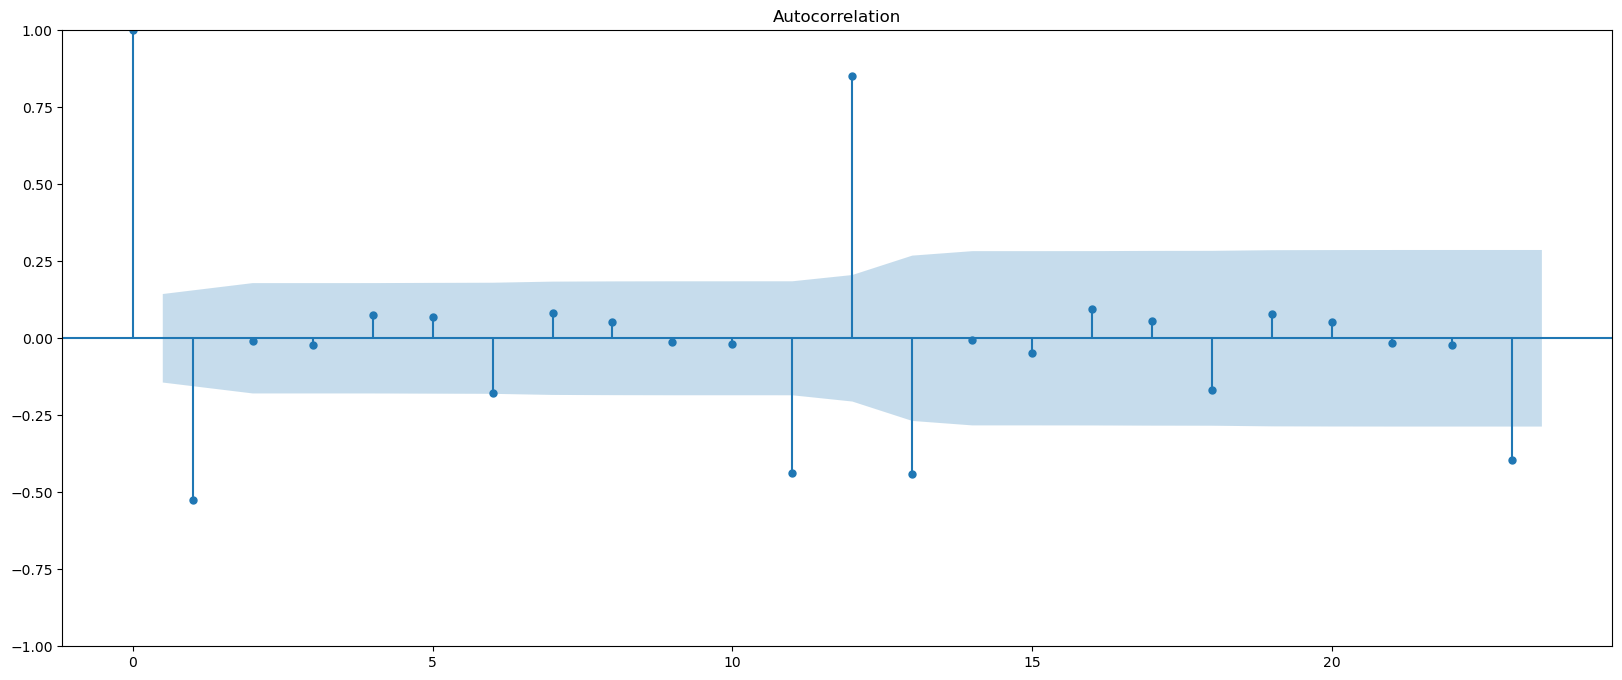

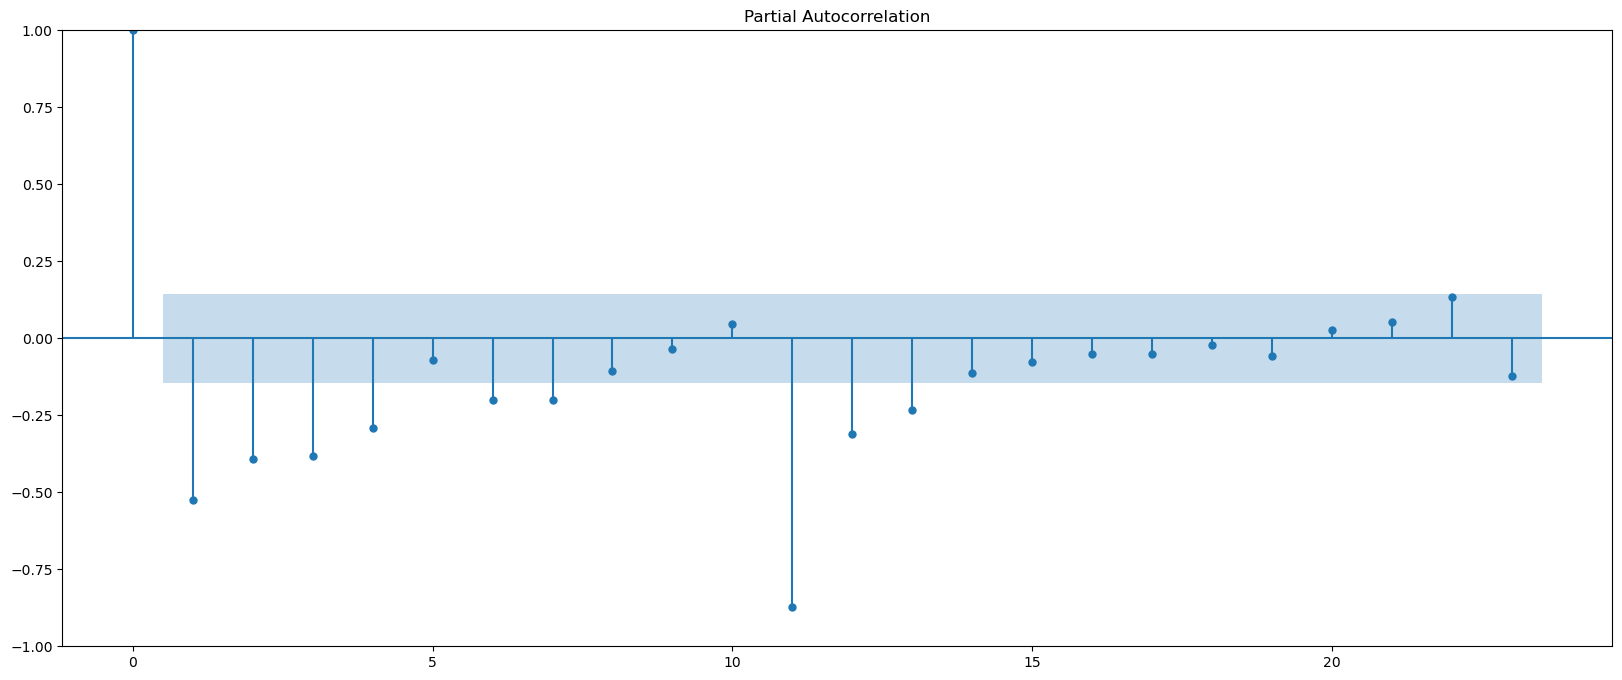

In [102]:
plot_acf(df3['Sparkling_diff'].diff().dropna())
plot_pacf(df3['Sparkling_diff'].diff().dropna());

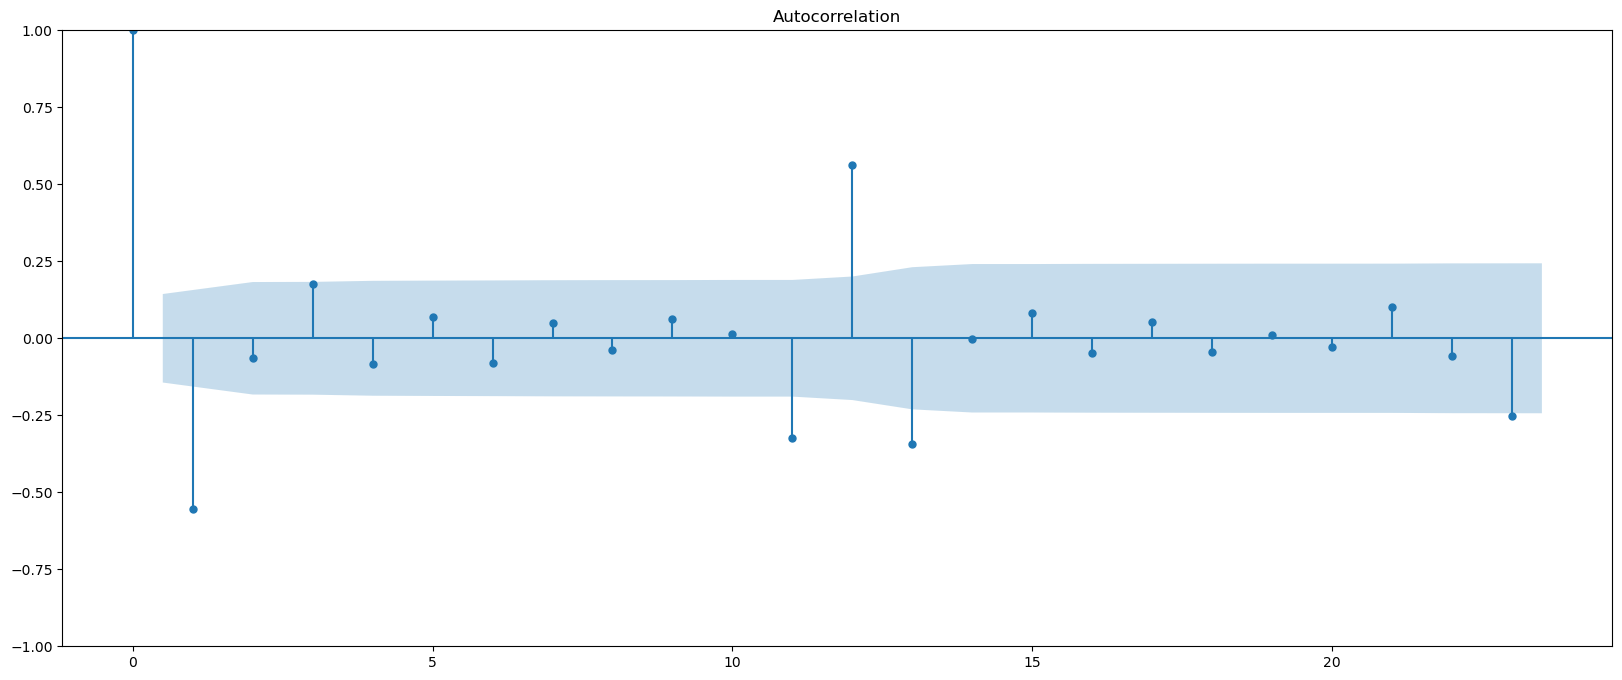

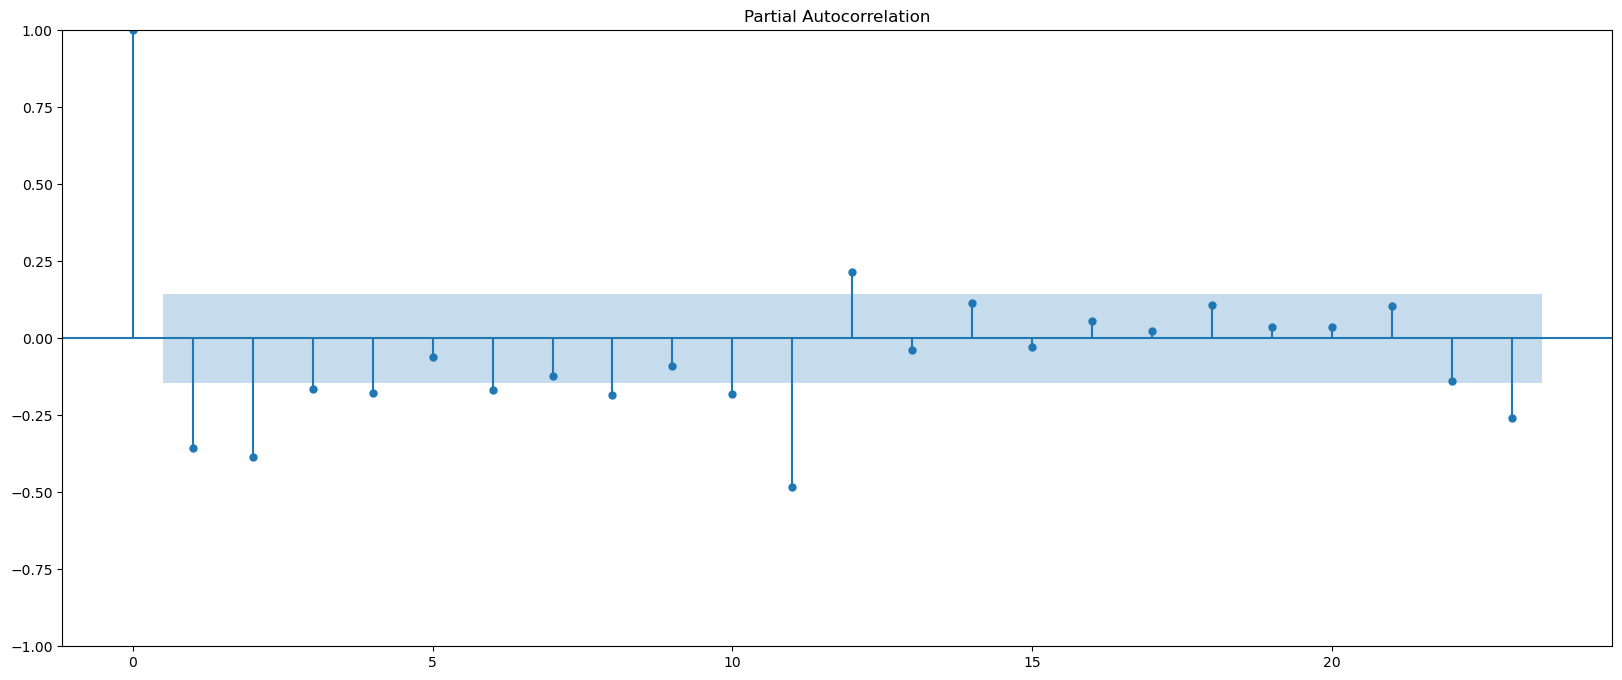

In [103]:
plot_acf(df3['Rose_diff'].diff().dropna())
plot_pacf(df3['Rose'].diff().dropna());

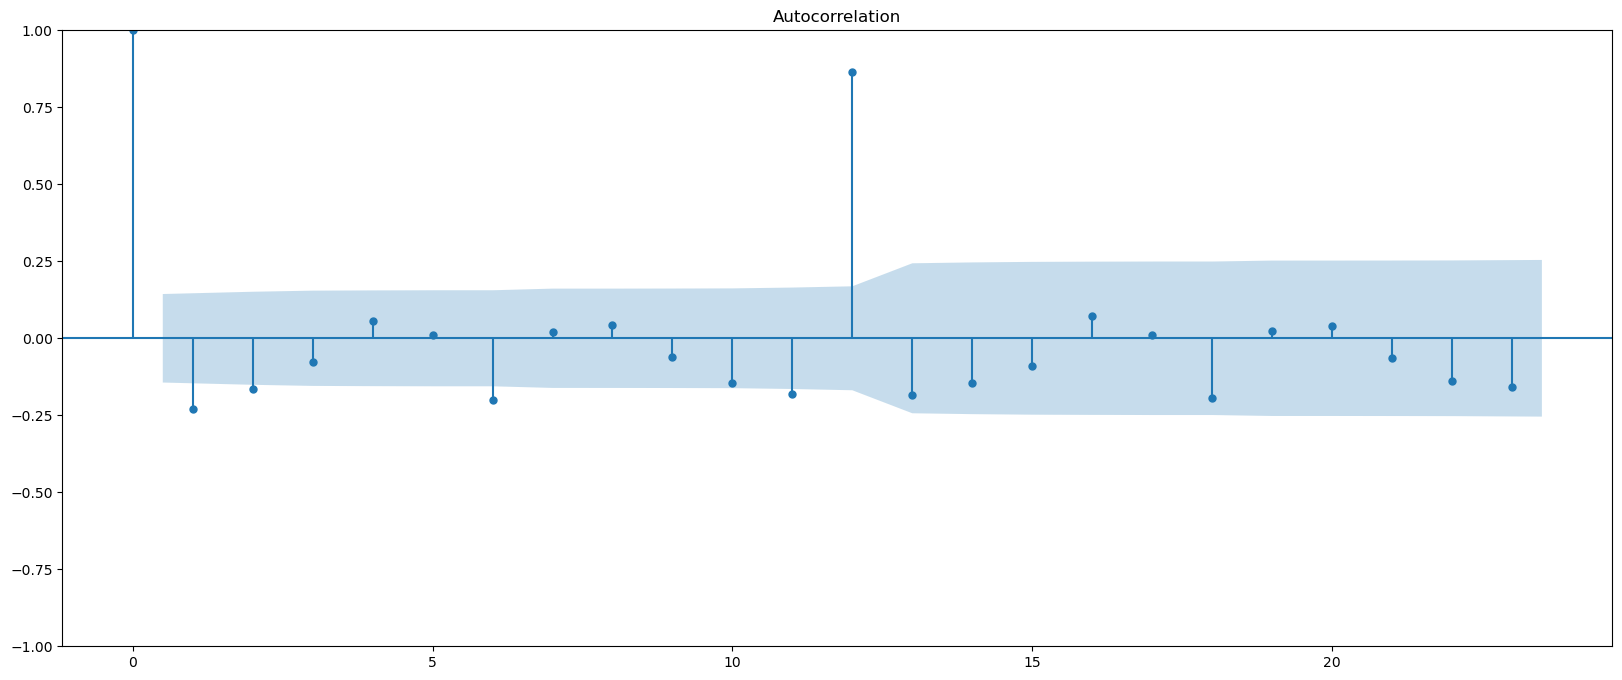

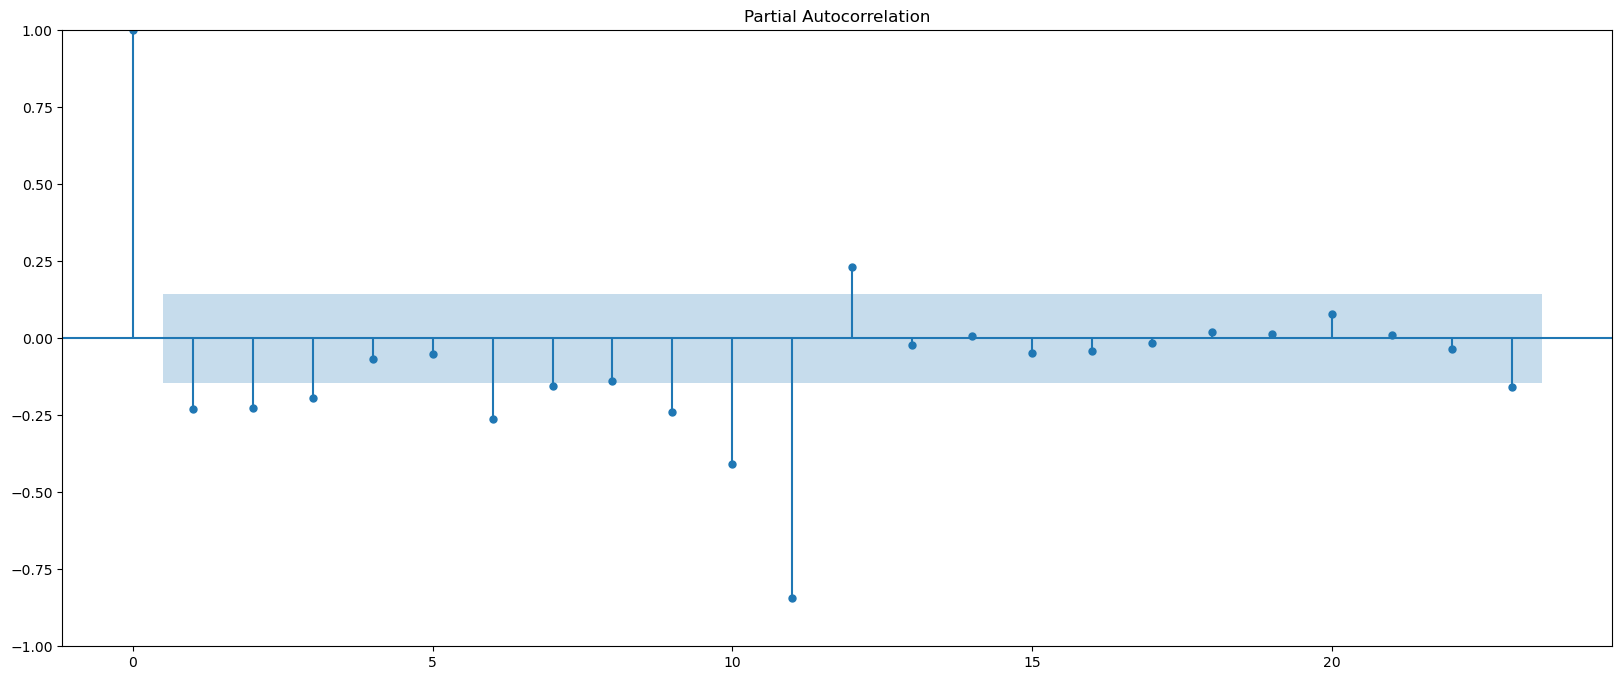

In [104]:
plot_acf(df3['TotalSales'].diff().dropna())
plot_pacf(df3['TotalSales'].diff().dropna());

In [105]:
split_point=int(len(df3)*0.7)
train_ARIMA=df3.iloc[:split_point]
test_ARIMA=df3.iloc[split_point:]

In [106]:
s1=adfuller(train_ARIMA['Sparkling_diff'])
s2=adfuller(train_ARIMA['Rose_diff'])
s3=adfuller(train_ARIMA['TotalSales_diff'])
print(s1)
print(s2)
print(s3)

(-10.934577759437603, 9.631988563405288e-20, 11, 118, {'1%': -3.4870216863700767, '5%': -2.8863625166643136, '10%': -2.580009026141913}, 1758.0715615217284)
(-6.480673339707341, 1.2974347408097101e-08, 12, 117, {'1%': -3.487517288664615, '5%': -2.8865777180380032, '10%': -2.5801239192052012}, 1071.7786536933036)
(-11.007973455449191, 6.431850822247839e-20, 11, 118, {'1%': -3.4870216863700767, '5%': -2.8863625166643136, '10%': -2.580009026141913}, 1762.6705067423475)


Selecting the parameters

In [107]:
p1=range(0,2)
q1=range(0,5)
d1=range(0,2)

ARIMA1=list(itertools.product(p1,d1,q1))
SARIMA1=[(x[0],x[1],x[2],12) for x in list(itertools.product(p1,d1,q1))]

In [108]:
p2=range(0,2)
q2=range(0,5)
d2=range(0,2)

ARIMA2=list(itertools.product(p2,d2,q2))
SARIMA2=[(x[0],x[1],x[2],12) for x in list(itertools.product(p2,d2,q2))]

In [109]:
p3=range(0,3)
q3=range(0,4)
d3=range(0,2)

ARIMA3=list(itertools.product(p3,d3,q3))
SARIMA3=[(x[0],x[1],x[2],12) for x in list(itertools.product(p3,d3,q3))]

ARIMA

In [110]:
ARIMA_AIC1=pd.DataFrame(columns=['param','AIC'])

In [111]:
for param in ARIMA1:
        m13=ARIMA(train_ARIMA['Sparkling_diff'].values,order=param).fit()
        d1=pd.DataFrame({'param':param,'AIC':m13.aic})
        ARIMA_AIC1=pd.concat([ARIMA_AIC1,d1],ignore_index=True)
        print('ARIMA{} - AIC:{}'.format(param,m13.aic))

ARIMA(0, 0, 0) - AIC:2250.9999358601044
ARIMA(0, 0, 1) - AIC:2233.4823913744285
ARIMA(0, 0, 2) - AIC:2209.8866753349175


C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 0, 3) - AIC:2210.665561687765


C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 4) - AIC:2211.2153065384327
ARIMA(0, 1, 0) - AIC:2341.785607022939
ARIMA(0, 1, 1) - AIC:2239.077063678733
ARIMA(0, 1, 2) - AIC:2233.1878659491567
ARIMA(0, 1, 3) - AIC:2203.1417953672594
ARIMA(0, 1, 4) - AIC:2205.1441782501715
ARIMA(1, 0, 0) - AIC:2249.4070146006034
ARIMA(1, 0, 1) - AIC:2212.440088987955


C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2) - AIC:2211.0716874886184


C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 3) - AIC:2212.1055103376966


C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 4) - AIC:2203.549961274749
ARIMA(1, 1, 0) - AIC:2311.321573280851
ARIMA(1, 1, 1) - AIC:2237.672791131051


C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2) - AIC:2206.7349070140463


C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 3) - AIC:2204.231355303428
ARIMA(1, 1, 4) - AIC:2208.551146437989


In [112]:
ARIMA_AIC1.sort_values(by='AIC',ascending=True)

param          AIC
24     0  2203.141795
26     3  2203.141795
25     1  2203.141795
42     1  2203.549961
43     0  2203.549961
44     4  2203.549961
54     1  2204.231355
55     1  2204.231355
56     3  2204.231355
28     1  2205.144178
27     0  2205.144178
29     4  2205.144178
52     1  2206.734907
51     1  2206.734907
53     2  2206.734907
58     1  2208.551146
57     1  2208.551146
59     4  2208.551146
8      2  2209.886675
7      0  2209.886675
6      0  2209.886675
10     0  2210.665562
9      0  2210.665562
11     3  2210.665562
37     0  2211.071687
36     1  2211.071687
38     2  2211.071687
13     0  2211.215307
12     0  2211.215307
14     4  2211.215307
41     3  2212.105510
40     0  2212.105510
39     1  2212.105510
34     0  2212.440089
35     1  2212.440089
33     1  2212.440089
21     0  2233.187866
22     1  2233.187866
23     2  2233.187866
4      0  2233.482391
5      1  2233.482391
3      0  2233.482391
49     1  2237.672791
48     1  2237.672791
50     1  2237.672791
18     0  2239.077064
20     1  2239.077064
19     1  2239.077064
32     0  2249.407015
31     0  2249.407015
30     1  2249.407015
2      0  2250.999936
1      0  2250.999936
0      0  2250.999936
46     1  2311.321573
47     0  2311.321573
45     1  2311.321573
17     0  2341.785607
15     0  2341.785607
16     1  2341.785607

In [113]:
m14=ARIMA(train_ARIMA['Sparkling_diff'].values,order=(0,1,3)).fit()
print(m14.summary())

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  130
Model:                 ARIMA(0, 1, 3)   Log Likelihood               -1097.571
Date:                Sun, 11 Aug 2024   AIC                           2203.142
Time:                        11:24:15   BIC                           2214.581
Sample:                             0   HQIC                          2207.790
                                - 130                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.5645      0.124    -12.666      0.000      -1.807      -1.322
ma.L2          0.1328      0.151      0.882      0.378      -0.162       0.428
ma.L3          0.4339      0.076      5.688      0.0

In [114]:
m14A=ARIMA(train_ARIMA['Sparkling_diff'].values,order=(4,1,1)).fit()
print(m14A.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  130
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -1108.802
Date:                Sun, 11 Aug 2024   AIC                           2229.605
Time:                        11:24:15   BIC                           2246.764
Sample:                             0   HQIC                          2236.577
                                - 130                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2620      0.102     -2.560      0.010      -0.463      -0.061
ar.L2         -0.3053      0.116     -2.632      0.008      -0.533      -0.078
ar.L3         -0.1969      0.107     -1.831      0.0

In [115]:
pred1=m14.forecast(steps=len(test_ARIMA['Sparkling_diff']))

In [116]:
pred1A=m14A.forecast(steps=len(test_ARIMA['Sparkling_diff']))

In [117]:
rmse31=mean_squared_error(test_ARIMA['Sparkling_diff'],pred1,squared=False)

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [118]:
rmse31A=mean_squared_error(test_ARIMA['Sparkling_diff'],pred1A,squared=False)

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [119]:
ARIMA_AIC2=pd.DataFrame(columns=['param','AIC'])

In [120]:
for param in ARIMA2:
        m15=ARIMA(train_ARIMA['Rose_diff'].values,order=param).fit()
        d2=pd.DataFrame({'param':param,'AIC':m15.aic})
        ARIMA_AIC2=pd.concat([ARIMA_AIC2,d2],ignore_index=True)
        print('ARIMA{} - AIC:{}'.format(param,m15.aic))

ARIMA(0, 0, 0) - AIC:1324.3248854728772
ARIMA(0, 0, 1) - AIC:1267.4989271062943
ARIMA(0, 0, 2) - AIC:1263.968335933268
ARIMA(0, 0, 3) - AIC:1265.249790559562


C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 0, 4) - AIC:1266.0596373525364
ARIMA(0, 1, 0) - AIC:1442.4423187640311
ARIMA(0, 1, 1) - AIC:1320.032559687078
ARIMA(0, 1, 2) - AIC:1270.060271835686
ARIMA(0, 1, 3) - AIC:1266.9586767083317


C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 4) - AIC:1268.4845908987686
ARIMA(1, 0, 0) - AIC:1308.0800055773016
ARIMA(1, 0, 1) - AIC:1264.7812199306088
ARIMA(1, 0, 2) - AIC:1264.547716735296
ARIMA(1, 0, 3) - AIC:1266.5031766625693


C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 4) - AIC:1265.1407519584595
ARIMA(1, 1, 0) - AIC:1396.8574693491928
ARIMA(1, 1, 1) - AIC:1304.5344124486787
ARIMA(1, 1, 2) - AIC:1267.771815562785
ARIMA(1, 1, 3) - AIC:1273.5074053479575
ARIMA(1, 1, 4) - AIC:1268.8433924793515


C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [121]:
ARIMA_AIC2.sort_values(by='AIC',ascending=True)

param          AIC
6      0  1263.968336
7      0  1263.968336
8      2  1263.968336
36     1  1264.547717
38     2  1264.547717
37     0  1264.547717
33     1  1264.781220
35     1  1264.781220
34     0  1264.781220
42     1  1265.140752
43     0  1265.140752
44     4  1265.140752
9      0  1265.249791
10     0  1265.249791
11     3  1265.249791
13     0  1266.059637
12     0  1266.059637
14     4  1266.059637
41     3  1266.503177
40     0  1266.503177
39     1  1266.503177
25     1  1266.958677
24     0  1266.958677
26     3  1266.958677
5      1  1267.498927
4      0  1267.498927
3      0  1267.498927
51     1  1267.771816
52     1  1267.771816
53     2  1267.771816
28     1  1268.484591
27     0  1268.484591
29     4  1268.484591
57     1  1268.843392
59     4  1268.843392
58     1  1268.843392
23     2  1270.060272
22     1  1270.060272
21     0  1270.060272
54     1  1273.507405
56     3  1273.507405
55     1  1273.507405
50     1  1304.534412
49     1  1304.534412
48     1  1304.534412
31     0  1308.080006
30     1  1308.080006
32     0  1308.080006
18     0  1320.032560
19     1  1320.032560
20     1  1320.032560
1      0  1324.324885
2      0  1324.324885
0      0  1324.324885
46     1  1396.857469
45     1  1396.857469
47     0  1396.857469
16     1  1442.442319
17     0  1442.442319
15     0  1442.442319

In [122]:
m16=ARIMA(train_ARIMA['Rose_diff'].values,order=(0,0,2)).fit()
print(m16.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  130
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -627.984
Date:                Sun, 11 Aug 2024   AIC                           1263.968
Time:                        11:24:19   BIC                           1275.438
Sample:                             0   HQIC                          1268.629
                                - 130                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5186      0.143     -3.627      0.000      -0.799      -0.238
ma.L1         -0.7720      0.414     -1.867      0.062      -1.583       0.039
ma.L2         -0.2254      0.144     -1.568      0.1

In [123]:
m16A=ARIMA(train_ARIMA['Rose_diff'].values,order=(4,1,1)).fit()
print(m16A.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  130
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -636.152
Date:                Sun, 11 Aug 2024   AIC                           1284.304
Time:                        11:24:19   BIC                           1301.463
Sample:                             0   HQIC                          1291.276
                                - 130                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5823      0.074     -7.871      0.000      -0.727      -0.437
ar.L2         -0.5290      0.094     -5.633      0.000      -0.713      -0.345
ar.L3         -0.2371      0.101     -2.353      0.0

In [124]:
pred2=m16.forecast(steps=len(test_ARIMA['Rose_diff']))

In [125]:
pred2A=m16A.forecast(steps=len(test_ARIMA['Rose_diff']))

In [126]:
rmse32=mean_squared_error(test_ARIMA['Rose_diff'],pred2,squared=False)

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [127]:
rmse32A=mean_squared_error(test_ARIMA['Rose_diff'],pred2A,squared=False)

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [128]:
ARIMA_AIC3=pd.DataFrame(columns=['param','AIC'])

In [129]:
for param in ARIMA3:
        m17=ARIMA(train_ARIMA['TotalSales_diff'].values,order=param).fit()
        d3=pd.DataFrame({'param':param,'AIC':m17.aic})
        ARIMA_AIC3=pd.concat([ARIMA_AIC3,d3],ignore_index=True)
        print('ARIMA{} - AIC:{}'.format(param,m17.aic))

ARIMA(0, 0, 0) - AIC:2256.33303151124
ARIMA(0, 0, 1) - AIC:2237.8511710715206
ARIMA(0, 0, 2) - AIC:2214.850236129009
ARIMA(0, 0, 3) - AIC:2215.727265608578
ARIMA(0, 1, 0) - AIC:2347.6662979766634
ARIMA(0, 1, 1) - AIC:2244.367302184742


C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 1, 2) - AIC:2237.9456195448865
ARIMA(0, 1, 3) - AIC:2208.0793360806347
ARIMA(1, 0, 0) - AIC:2254.511862617344
ARIMA(1, 0, 1) - AIC:2217.3672439087923
ARIMA(1, 0, 2) - AIC:2216.110035334839
ARIMA(1, 0, 3) - AIC:2217.2317218510498
ARIMA(1, 1, 0) - AIC:2316.7465434575442
ARIMA(1, 1, 1) - AIC:2242.736059218261
ARIMA(1, 1, 2) - AIC:2211.623016046088


C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 3) - AIC:2209.8068086508406
ARIMA(2, 0, 0) - AIC:2246.913197905839


C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1) - AIC:2215.058194773628


C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2) - AIC:2196.726912592132


C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 3) - AIC:2215.8995144303753
ARIMA(2, 1, 0) - AIC:2296.079166294593
ARIMA(2, 1, 1) - AIC:2235.6170299029527


C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2) - AIC:2208.2199713595123
ARIMA(2, 1, 3) - AIC:2245.341722851906


C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [130]:
ARIMA_AIC3.sort_values(by='AIC',ascending=True)

param          AIC
55     0  2196.726913
56     2  2196.726913
54     2  2196.726913
21     0  2208.079336
22     1  2208.079336
..   ...          ...
37     1  2316.746543
38     0  2316.746543
14     0  2347.666298
13     1  2347.666298
12     0  2347.666298

[72 rows x 2 columns]

In [131]:
m18=ARIMA(train_ARIMA['TotalSales_diff'].values,order=(2,0,2)).fit()
print(m18.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  130
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1092.363
Date:                Sun, 11 Aug 2024   AIC                           2196.727
Time:                        11:24:26   BIC                           2213.932
Sample:                             0   HQIC                          2203.718
                                - 130                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9411      0.983      5.029      0.000       3.015       6.867
ar.L1          1.2645      0.058     21.767      0.000       1.151       1.378
ar.L2         -0.5291      0.103     -5.119      0.0

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [132]:
m18A=ARIMA(train_ARIMA['TotalSales_diff'].values,order=(3,1,2)).fit()
print(m18A.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  130
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -731.844
Date:                Sun, 11 Aug 2024   AIC                           1475.687
Time:                        11:24:27   BIC                           1492.846
Sample:                             0   HQIC                          1482.659
                                - 130                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0083   1.33e-10  -7.59e+09      0.000      -1.008      -1.008
ar.L2          0.9689   7.15e-06   1.36e+05      0.000       0.969       0.969
ar.L3          0.9773   2.07e-07   4.73e+06      0.0

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [133]:
pred3=m18.forecast(steps=len(test_ARIMA['TotalSales_diff']))

In [134]:
pred3A=m18A.forecast(steps=len(test_ARIMA['TotalSales_diff']))

In [135]:
rmse33=mean_squared_error(test_ARIMA['TotalSales_diff'],pred3,squared=False)

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [136]:
rmse33A=mean_squared_error(test_ARIMA['TotalSales_diff'],pred3A,squared=False)

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [137]:
print(rmse31)
print(rmse32)
print(rmse33)
print(rmse31A)
print(rmse32A)
print(rmse33A)

1629.0760006854043
24.945695287607634
1623.9393766458018
1634.749304006798
24.74254221768183
25003.954602601378


In [138]:
SARIMA_AIC1=pd.DataFrame(columns=['param','seasonal','AIC'])

In [139]:
for param in ARIMA1:
    for param_seasonal in SARIMA1:
        m19=sm.tsa.statespace.SARIMAX(train_ARIMA['Sparkling_diff'].values,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforse_invertibility=False).fit(maxiter=1000)
        d4=pd.DataFrame({'param':[param],'seasonal':[param_seasonal],'AIC':[m19.aic]})
        SARIMA_AIC1=pd.concat([SARIMA_AIC1,d4],ignore_index=True)

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforse_invertibility']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA par

In [140]:
SARIMA_AIC1.sort_values(by=['AIC']).head()

param       seasonal         AIC
399  (1, 1, 4)  (1, 1, 4, 12)  981.369125
199  (0, 1, 4)  (1, 1, 4, 12)  981.712541
389  (1, 1, 4)  (0, 1, 4, 12)  984.638624
189  (0, 1, 4)  (0, 1, 4, 12)  985.641890
379  (1, 1, 3)  (1, 1, 4, 12)  992.325880

In [141]:
m20=sm.tsa.statespace.SARIMAX(train_ARIMA['Sparkling_diff'].values,order=(1,1,4),seasonal_order=(1,1,4,12),enforce_stationarity=False,enforse_invertibility=False).fit(maxtier=1000)
print(m20.summary())

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforse_invertibility']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:18: FutureWarning: Keyword arguments have been passed to the op

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  130
Model:             SARIMAX(1, 1, 4)x(1, 1, 4, 12)   Log Likelihood                -482.158
Date:                            Sun, 11 Aug 2024   AIC                            986.316
Time:                                    11:50:28   BIC                           1010.064
Sample:                                         0   HQIC                           995.672
                                            - 130                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8850      0.201     -4.406      0.000      -1.279      -0.491
ma.L1         -0.7466      1.455   

In [142]:
m20A=sm.tsa.statespace.SARIMAX(train_ARIMA['Sparkling_diff'].values,order=(4,1,1),seasonal_order=(4,1,1,12),enforce_stationarity=False,enforse_invertibility=False).fit(maxtier=1000)
print(m20A.summary())

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforse_invertibility']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: maxtier. After release 0.14, this will raise.
  warnings.warn(
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  130
Model:             SARIMAX(4, 1, 1)x(4, 1, 1, 12)   Log Likelihood                -494.433
Date:                            Sun, 11 Aug 2024   AIC                           1010.866
Time:                                    11:50:41   BIC                           1034.784
Sample:                                         0   HQIC                          1020.303
                                            - 130                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5325      0.271     -1.967      0.049      -1.063      -0.002
ar.L2         -0.5131      0.274   

In [143]:
pred4=m20.forecast(steps=len(test_ARIMA['Sparkling_diff']))

In [144]:
pred4A=m20A.forecast(steps=len(test_ARIMA['Sparkling_diff']))

In [145]:
rmse33=mean_squared_error(test_ARIMA['Sparkling_diff'],pred4,squared=False)

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [146]:
rmse33A=mean_squared_error(test_ARIMA['Sparkling_diff'],pred4A,squared=False)

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [147]:
SARIMA_AIC2=pd.DataFrame(columns=['param','seasonal','AIC'])

In [148]:
for param in ARIMA2:
    for param_seasonal in SARIMA2:
        m21=sm.tsa.statespace.SARIMAX(train_ARIMA['Rose_diff'].values,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforse_invertibility=False).fit(maxiter=1000)
        d5=pd.DataFrame({'param':[param],'seasonal':[param_seasonal],'AIC':[m21.aic]})
        SARIMA_AIC2=pd.concat([SARIMA_AIC2,d5],ignore_index=True)

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforse_invertibility']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA par

In [149]:
SARIMA_AIC2.sort_values(by=['AIC']).head()

param       seasonal         AIC
399  (1, 1, 4)  (1, 1, 4, 12)  554.994774
199  (0, 1, 4)  (1, 1, 4, 12)  557.371090
389  (1, 1, 4)  (0, 1, 4, 12)  559.869950
189  (0, 1, 4)  (0, 1, 4, 12)  560.132228
99   (0, 0, 4)  (1, 1, 4, 12)  560.945845

In [150]:
m21=sm.tsa.statespace.SARIMAX(train_ARIMA['Rose_diff'].values,order=(1,1,4),seasonal_order=(1,1,4,12),enforce_stationarity=False,enforse_invertibility=False).fit(maxtier=1000)
print(m21.summary())

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforse_invertibility']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:18: FutureWarning: Keyword arguments have been passed to the op

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  130
Model:             SARIMAX(1, 1, 4)x(1, 1, 4, 12)   Log Likelihood                -266.699
Date:                            Sun, 11 Aug 2024   AIC                            555.398
Time:                                    12:08:01   BIC                            579.145
Sample:                                         0   HQIC                           564.753
                                            - 130                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8761      0.234     -3.742      0.000      -1.335      -0.417
ma.L1         -0.9714     59.443   

In [151]:
m21A=sm.tsa.statespace.SARIMAX(train_ARIMA['Rose_diff'].values,order=(4,1,1),seasonal_order=(4,1,1,12),enforce_stationarity=False,enforse_invertibility=False).fit(maxtier=1000)
print(m21A.summary())

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforse_invertibility']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: maxtier. After release 0.14, this will raise.
  warnings.warn(


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  130
Model:             SARIMAX(4, 1, 1)x(4, 1, 1, 12)   Log Likelihood                -275.949
Date:                            Sun, 11 Aug 2024   AIC                            573.898
Time:                                    12:08:07   BIC                            597.817
Sample:                                         0   HQIC                           583.336
                                            - 130                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7754      0.143     -5.412      0.000      -1.056      -0.495
ar.L2         -0.6790      0.188   

In [152]:
pred5=m21.forecast(steps=len(test_ARIMA['Rose_diff']))

In [153]:
pred5A=m21A.forecast(steps=len(test_ARIMA['Rose_diff']))

In [154]:
rmse34=mean_squared_error(test_ARIMA['Rose_diff'],pred5,squared=False)

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [155]:
rmse34A=mean_squared_error(test_ARIMA['Rose_diff'],pred5A,squared=False)

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [156]:
SARIMA_AIC3=pd.DataFrame(columns=['param','seasonal','AIC'])

In [157]:
for param in ARIMA3:
    for param_seasonal in SARIMA3:
        m22=sm.tsa.statespace.SARIMAX(train_ARIMA['TotalSales_diff'].values,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforse_invertibility=False).fit(maxiter=1000)
        d6=pd.DataFrame({'param':[param],'seasonal':[param_seasonal],'AIC':[m22.aic]})
        SARIMA_AIC3=pd.concat([SARIMA_AIC3,d6],ignore_index=True)

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforse_invertibility']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum 

In [158]:
SARIMA_AIC3.sort_values(by=['AIC']).head()

param       seasonal          AIC
367  (1, 1, 3)  (0, 1, 3, 12)  1178.093269
175  (0, 1, 3)  (0, 1, 3, 12)  1178.422641
191  (0, 1, 3)  (2, 1, 3, 12)  1178.757614
375  (1, 1, 3)  (1, 1, 3, 12)  1179.768370
383  (1, 1, 3)  (2, 1, 3, 12)  1179.916664

In [159]:
m23=sm.tsa.statespace.SARIMAX(train_ARIMA['TotalSales_diff'].values,order=(1,1,3),seasonal_order=(0,1,3,12),enforce_stationarity=False,enforse_invertibility=False).fit(maxtier=1000)
print(m23.summary())

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforse_invertibility']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyw

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  130
Model:             SARIMAX(1, 1, 3)x(0, 1, 3, 12)   Log Likelihood                -581.047
Date:                            Sun, 11 Aug 2024   AIC                           1178.094
Time:                                    12:22:05   BIC                           1196.844
Sample:                                         0   HQIC                          1185.594
                                            - 130                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5832      0.334     -1.748      0.080      -1.237       0.071
ma.L1         -1.1716      0.353   

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [160]:
m23A=sm.tsa.statespace.SARIMAX(train_ARIMA['TotalSales_diff'].values,order=(3,1,2),seasonal_order=(3,1,2,12),enforce_stationarity=False,enforse_invertibility=False).fit(maxtier=1000)
print(m23A.summary())

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforse_invertibility']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: maxtier. After release 0.14, this will raise.
  warnings.warn(
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  130
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -595.634
Date:                            Sun, 11 Aug 2024   AIC                           1213.268
Time:                                    12:22:09   BIC                           1239.192
Sample:                                         0   HQIC                          1223.646
                                            - 130                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3458      0.712     -1.889      0.059      -2.742       0.051
ar.L2         -0.8092      0.518   

In [161]:
pred6=m23.forecast(steps=len(test_ARIMA['TotalSales_diff']))

In [162]:
pred6A=m23A.forecast(steps=len(test_ARIMA['TotalSales_diff']))

In [163]:
rmse35=mean_squared_error(test_ARIMA['TotalSales_diff'],pred6,squared=False)

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [164]:
rmse35A=mean_squared_error(test_ARIMA['TotalSales_diff'],pred6A,squared=False)

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [165]:
print(rmse33)
print(rmse34)
print(rmse35)
print(rmse33A)
print(rmse34A)
print(rmse35A)

495.9232664371245
16.658897149483852
478.32161026812946
468.85425502149616
15.138641524319455
481.9514995945942


In [170]:
m_f1=ExponentialSmoothing(df3['Sparkling'],trend='additive',seasonal='additive')
r_f1=m_f1.fit(optimized=True)

m_f2=ExponentialSmoothing(df3['Rose'],trend='additive',seasonal='additive')
r_f2=m_f2.fit(optimized=True)

m_f3=ExponentialSmoothing(df3['TotalSales'],trend='additive',seasonal='additive')
r_f3=m_f3.fit(optimized=True)

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [179]:
esa_forecast1=r_f1.forecast(steps=12)
esa_forecast2=r_f2.forecast(steps=12)
esa_forecast3=r_f3.forecast(steps=12)

In [181]:
rmse_f1=mean_squared_error(df3['Sparkling'],r_f1.fittedvalues,squared=False)
rmse_f2=mean_squared_error(df3['Rose'],r_f2.fittedvalues,squared=False)
rmse_f3=mean_squared_error(df3['TotalSales'],r_f3.fittedvalues,squared=False)

C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Arindam Adhikari\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [182]:
print(rmse_f1)
print(rmse_f2)
print(rmse_f3)

365.3076437844148
18.472685677148423
369.99695459664616


<Axes: xlabel='Date'>

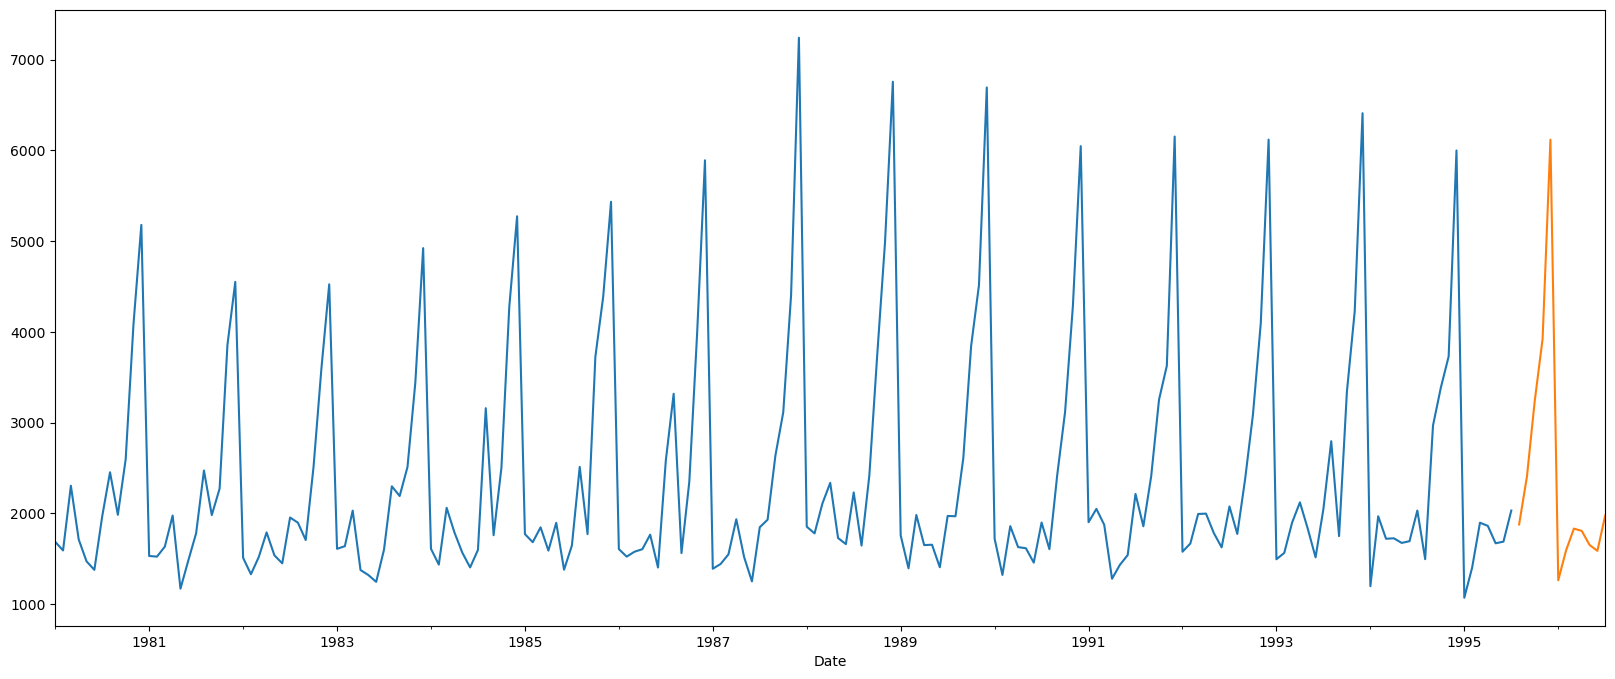

In [183]:
df3['Sparkling'].plot()
esa_forecast1.plot()

<Axes: xlabel='Date'>

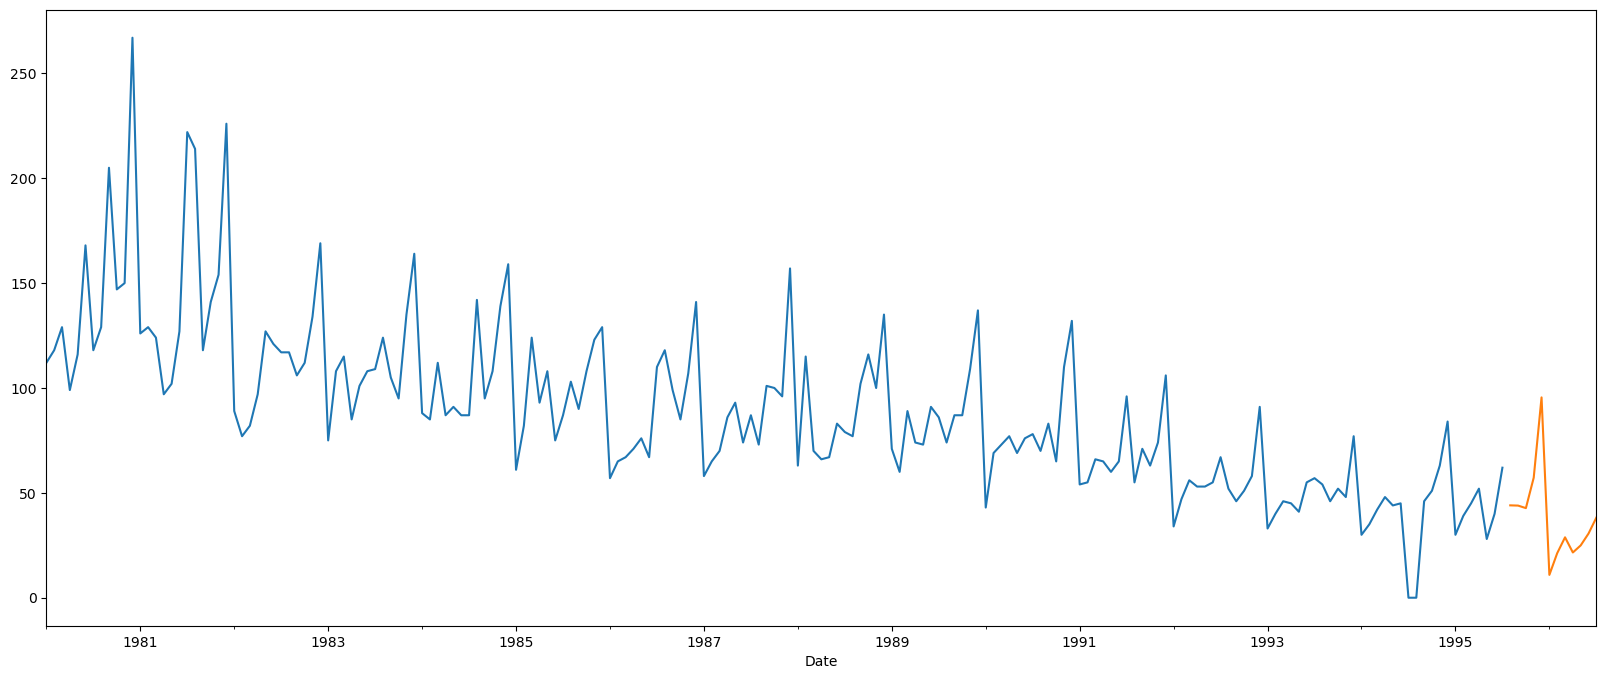

In [185]:
df3['Rose'].plot()
esa_forecast2.plot()

<Axes: xlabel='Date'>

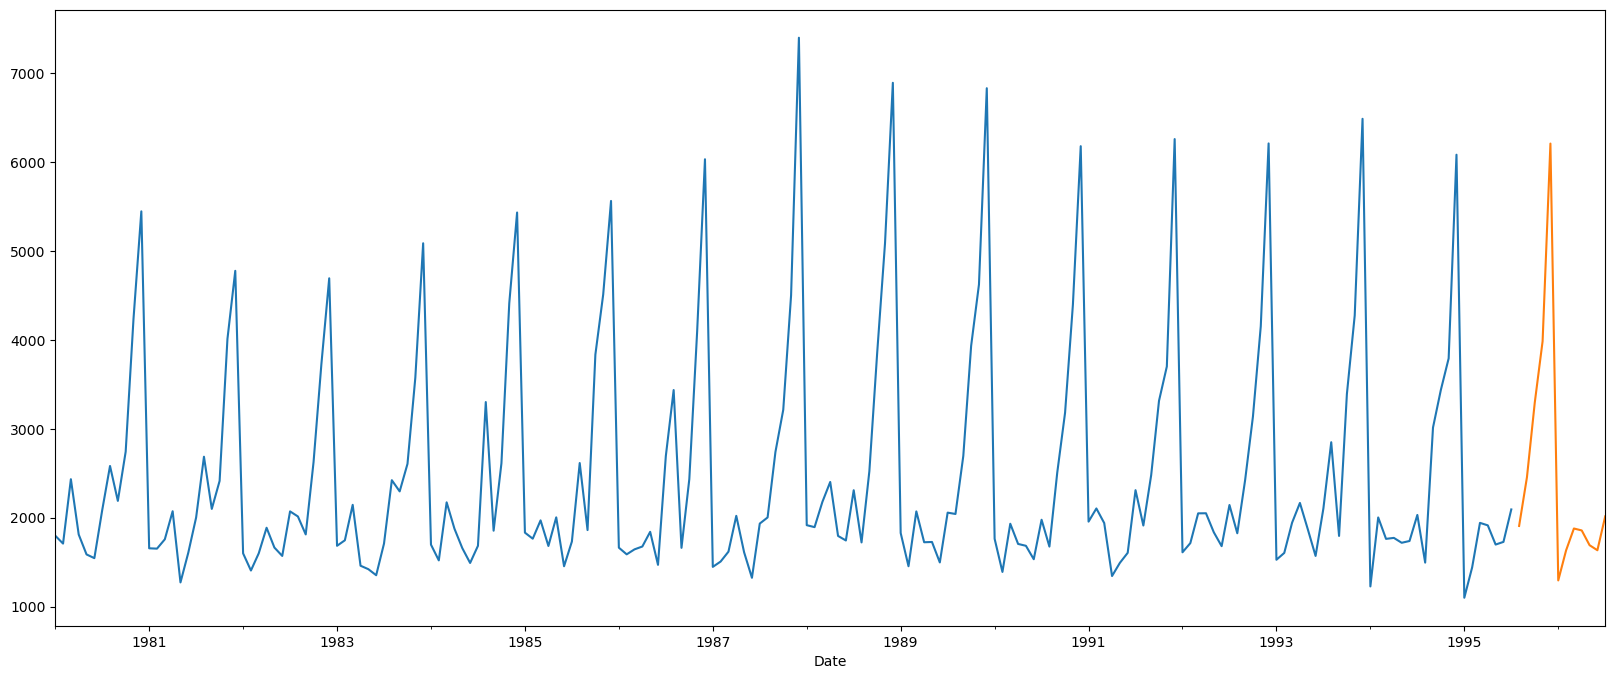

In [186]:
df3['TotalSales'].plot()
esa_forecast3.plot()